/Users/songyuru/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Step 1,before optimize, Minibatch Loss= 3.0521
Step 1, Minibatch Loss= 0.8118


/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:157: RuntimeWarning: invalid value encountered in arcsin
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:163: RuntimeWarning: invalid value encountered in arcsin
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:158: RuntimeWarning: invalid value encountered in arcsin
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:164: RuntimeWarning: invalid value encountered in arcsin


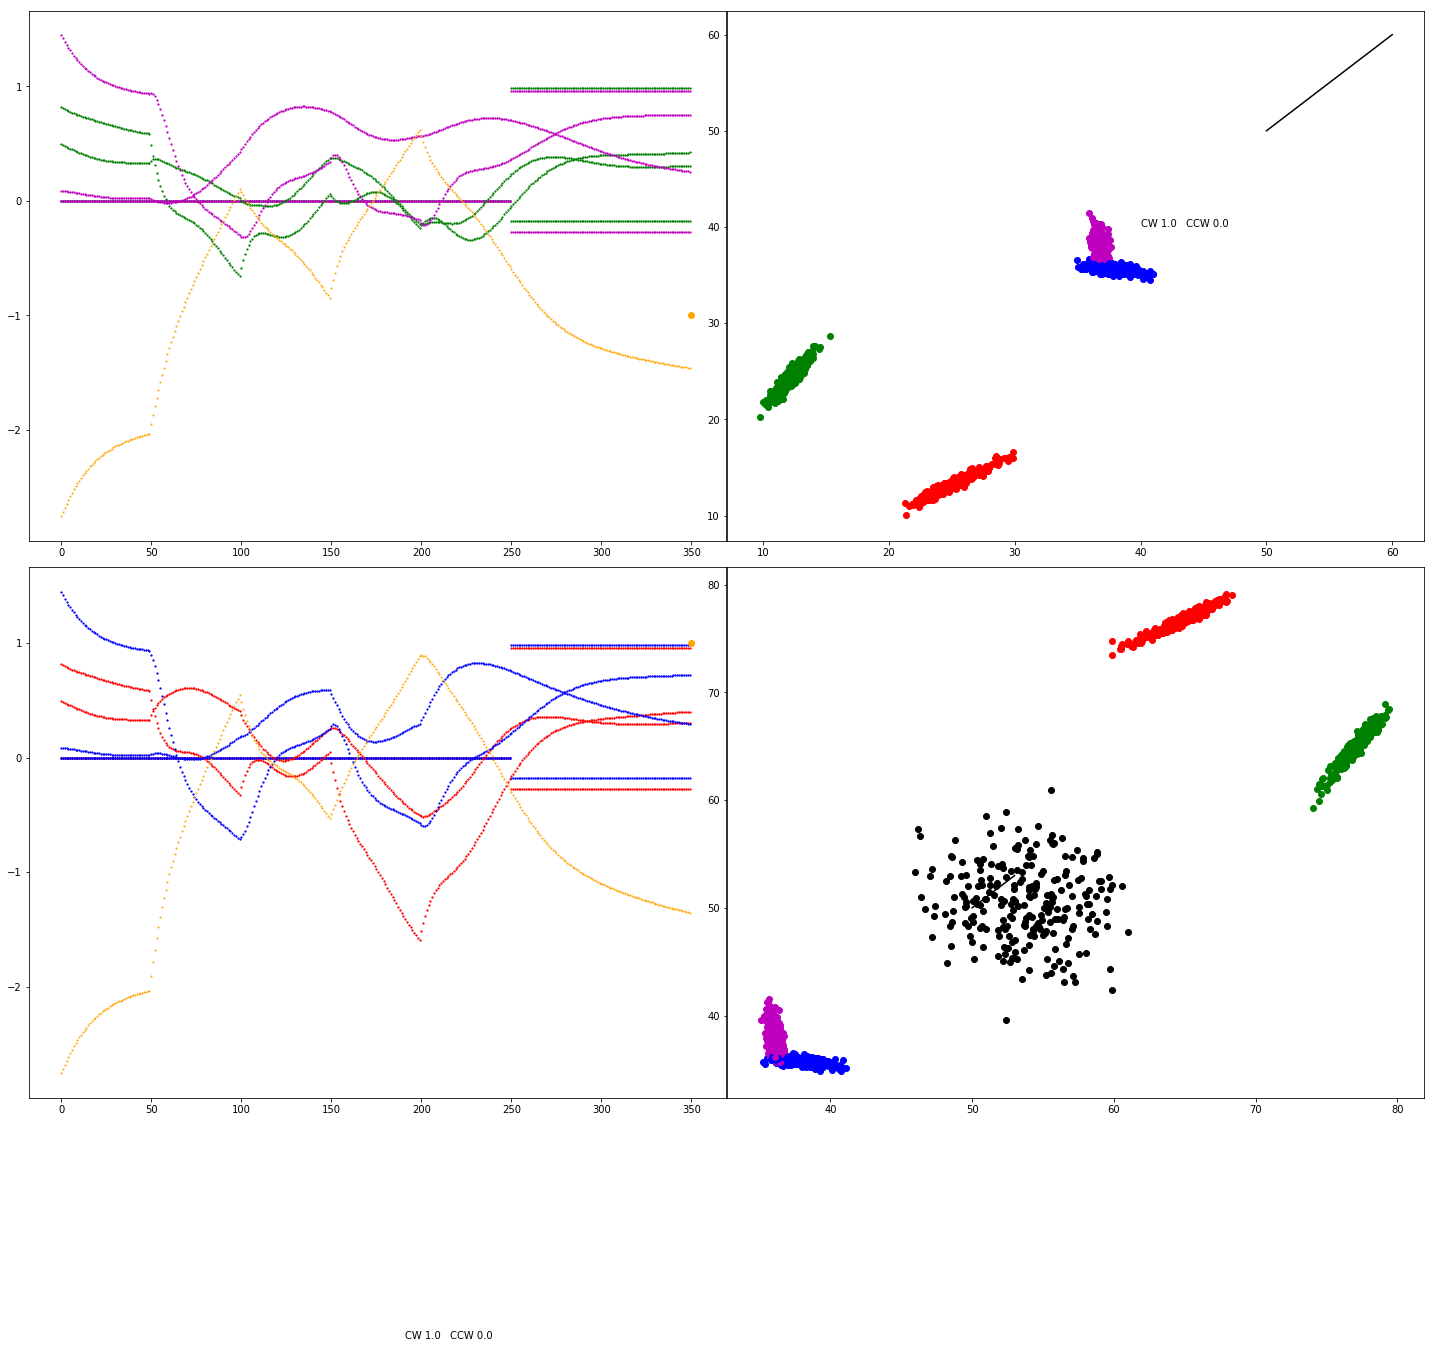

Step 50,before optimize, Minibatch Loss= 0.2460
Step 50, Minibatch Loss= 0.2419


/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:112: RuntimeWarning: invalid value encountered in arcsin
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:113: RuntimeWarning: invalid value encountered in arccos
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:136: RuntimeWarning: invalid value encountered in arcsin
/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:135: RuntimeWarning: invalid value encountered in arcsin


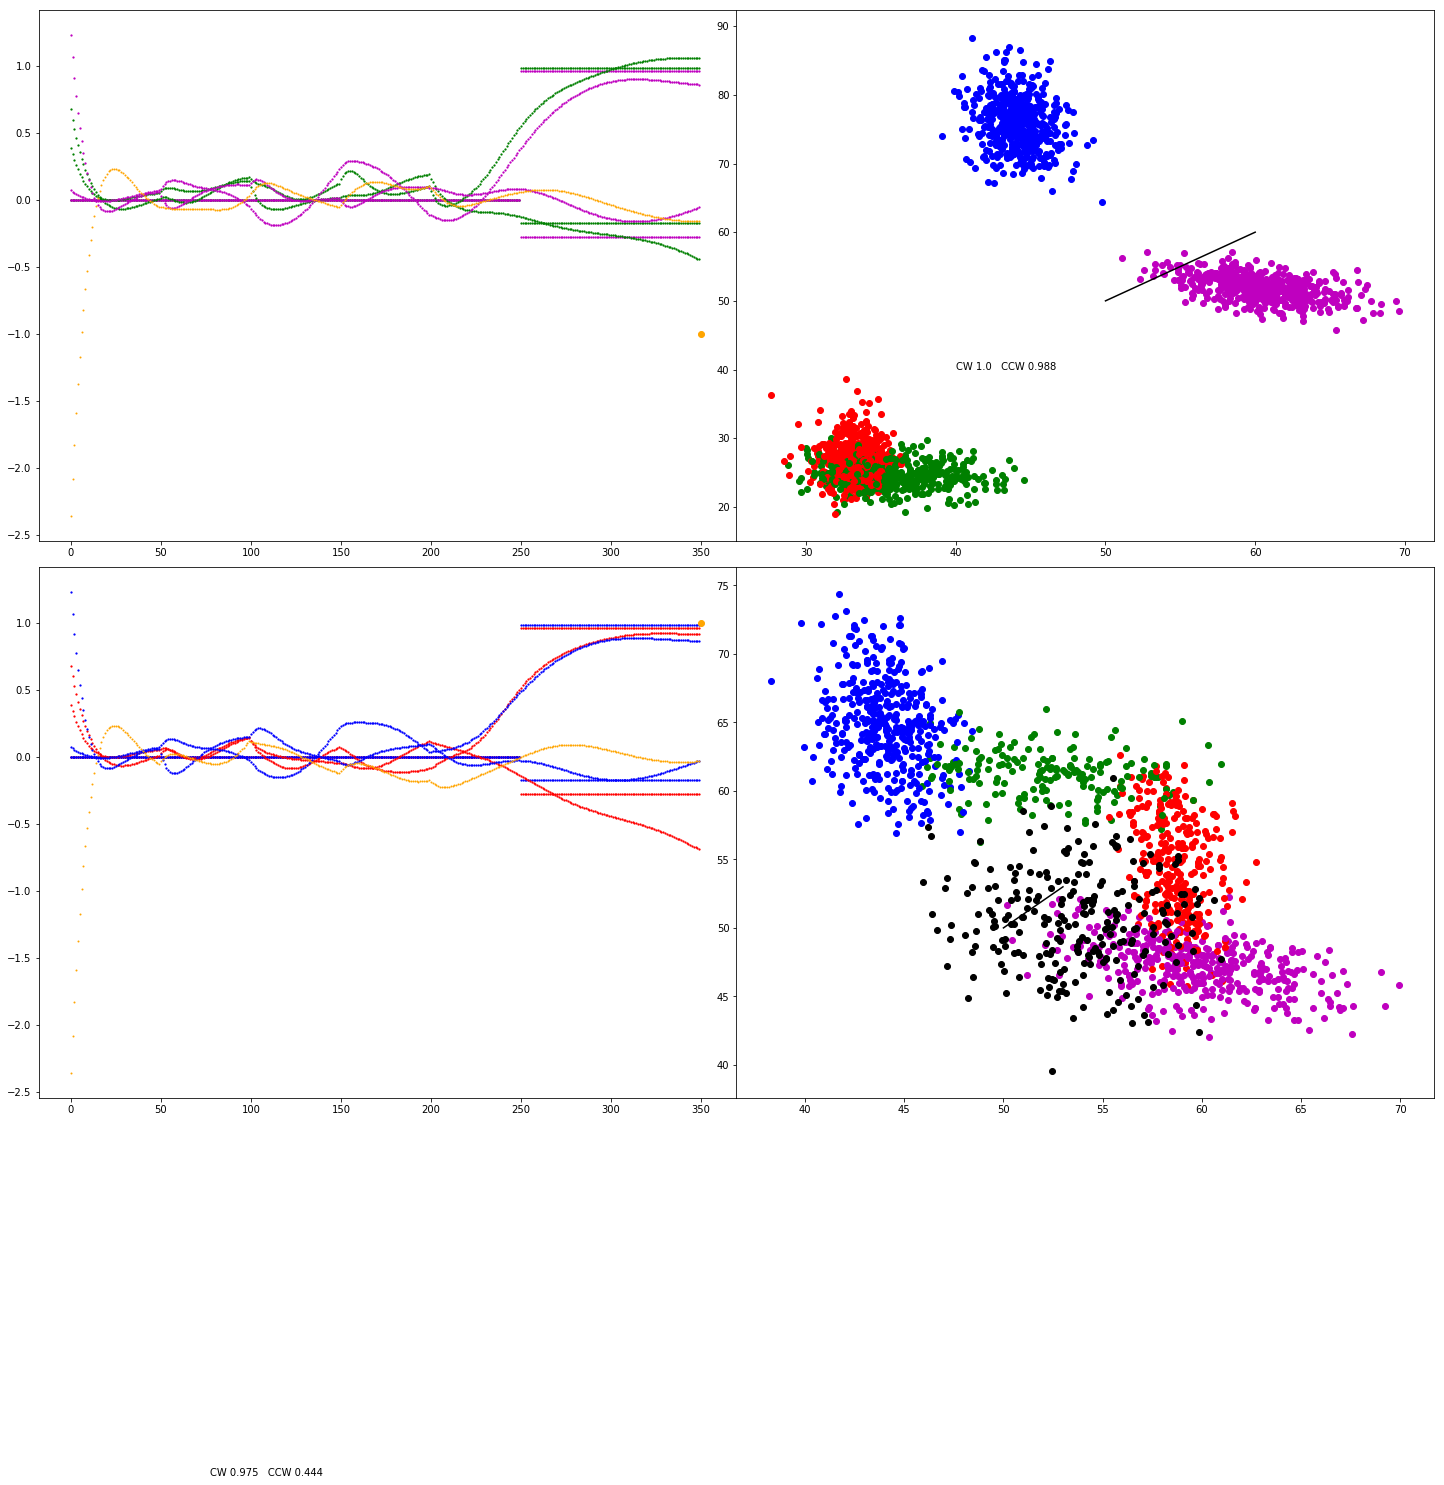

Step 100,before optimize, Minibatch Loss= 0.1573
Step 100, Minibatch Loss= 0.1550


/Users/songyuru/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in arcsin


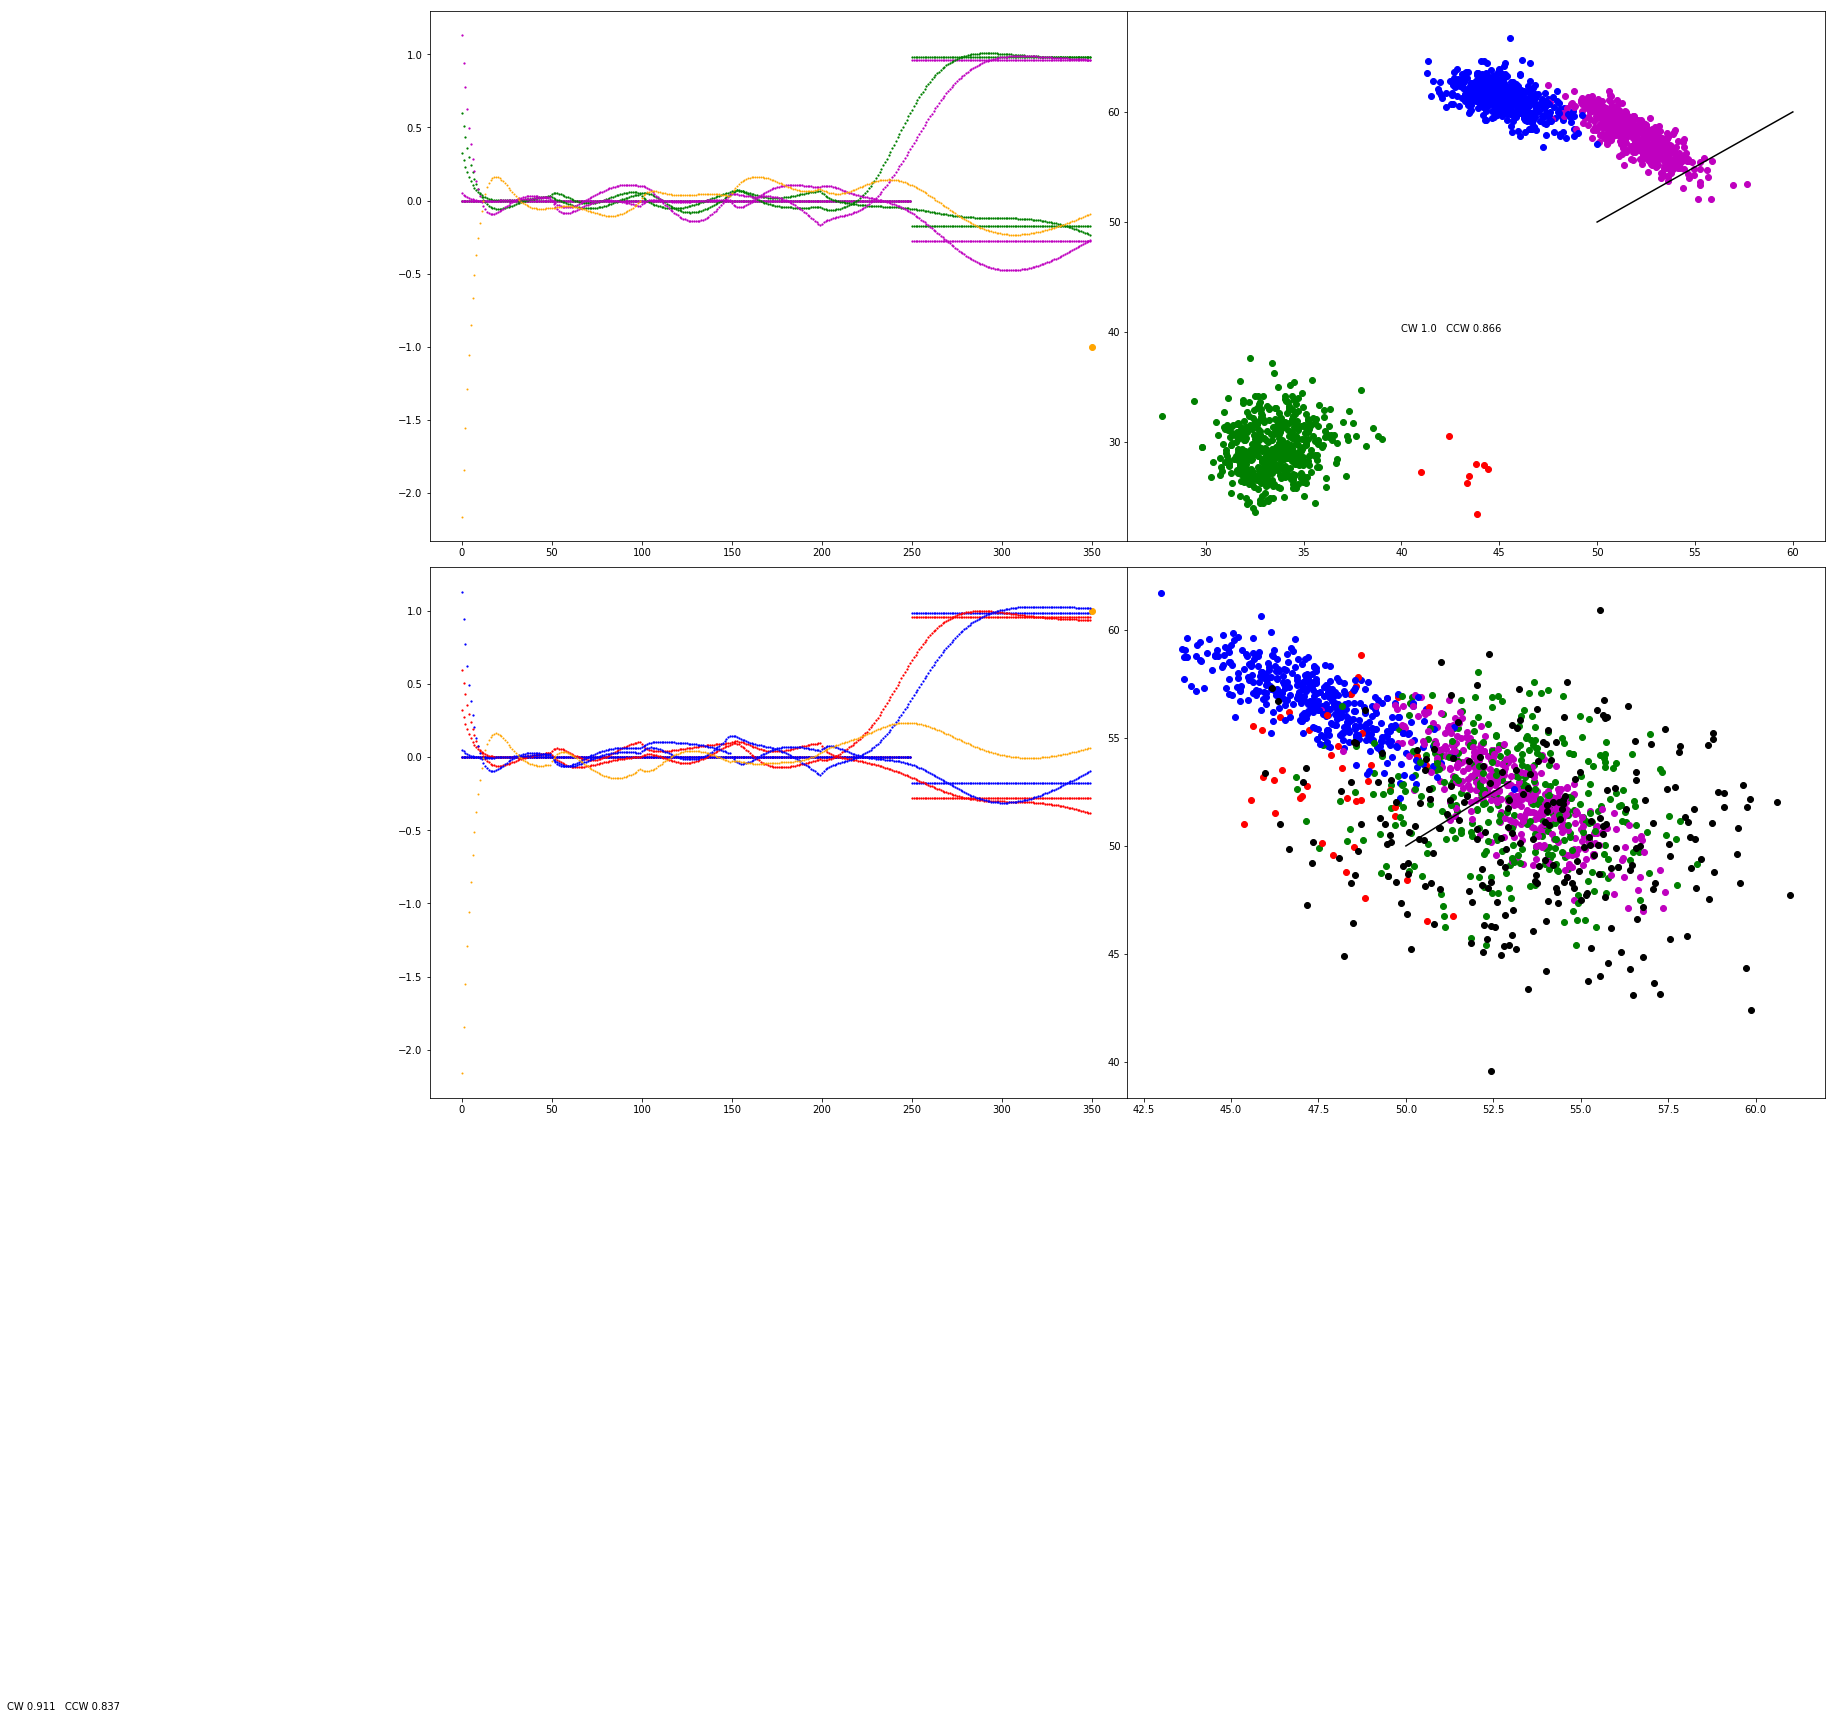

Step 150,before optimize, Minibatch Loss= 0.1006
Step 150, Minibatch Loss= 0.0985


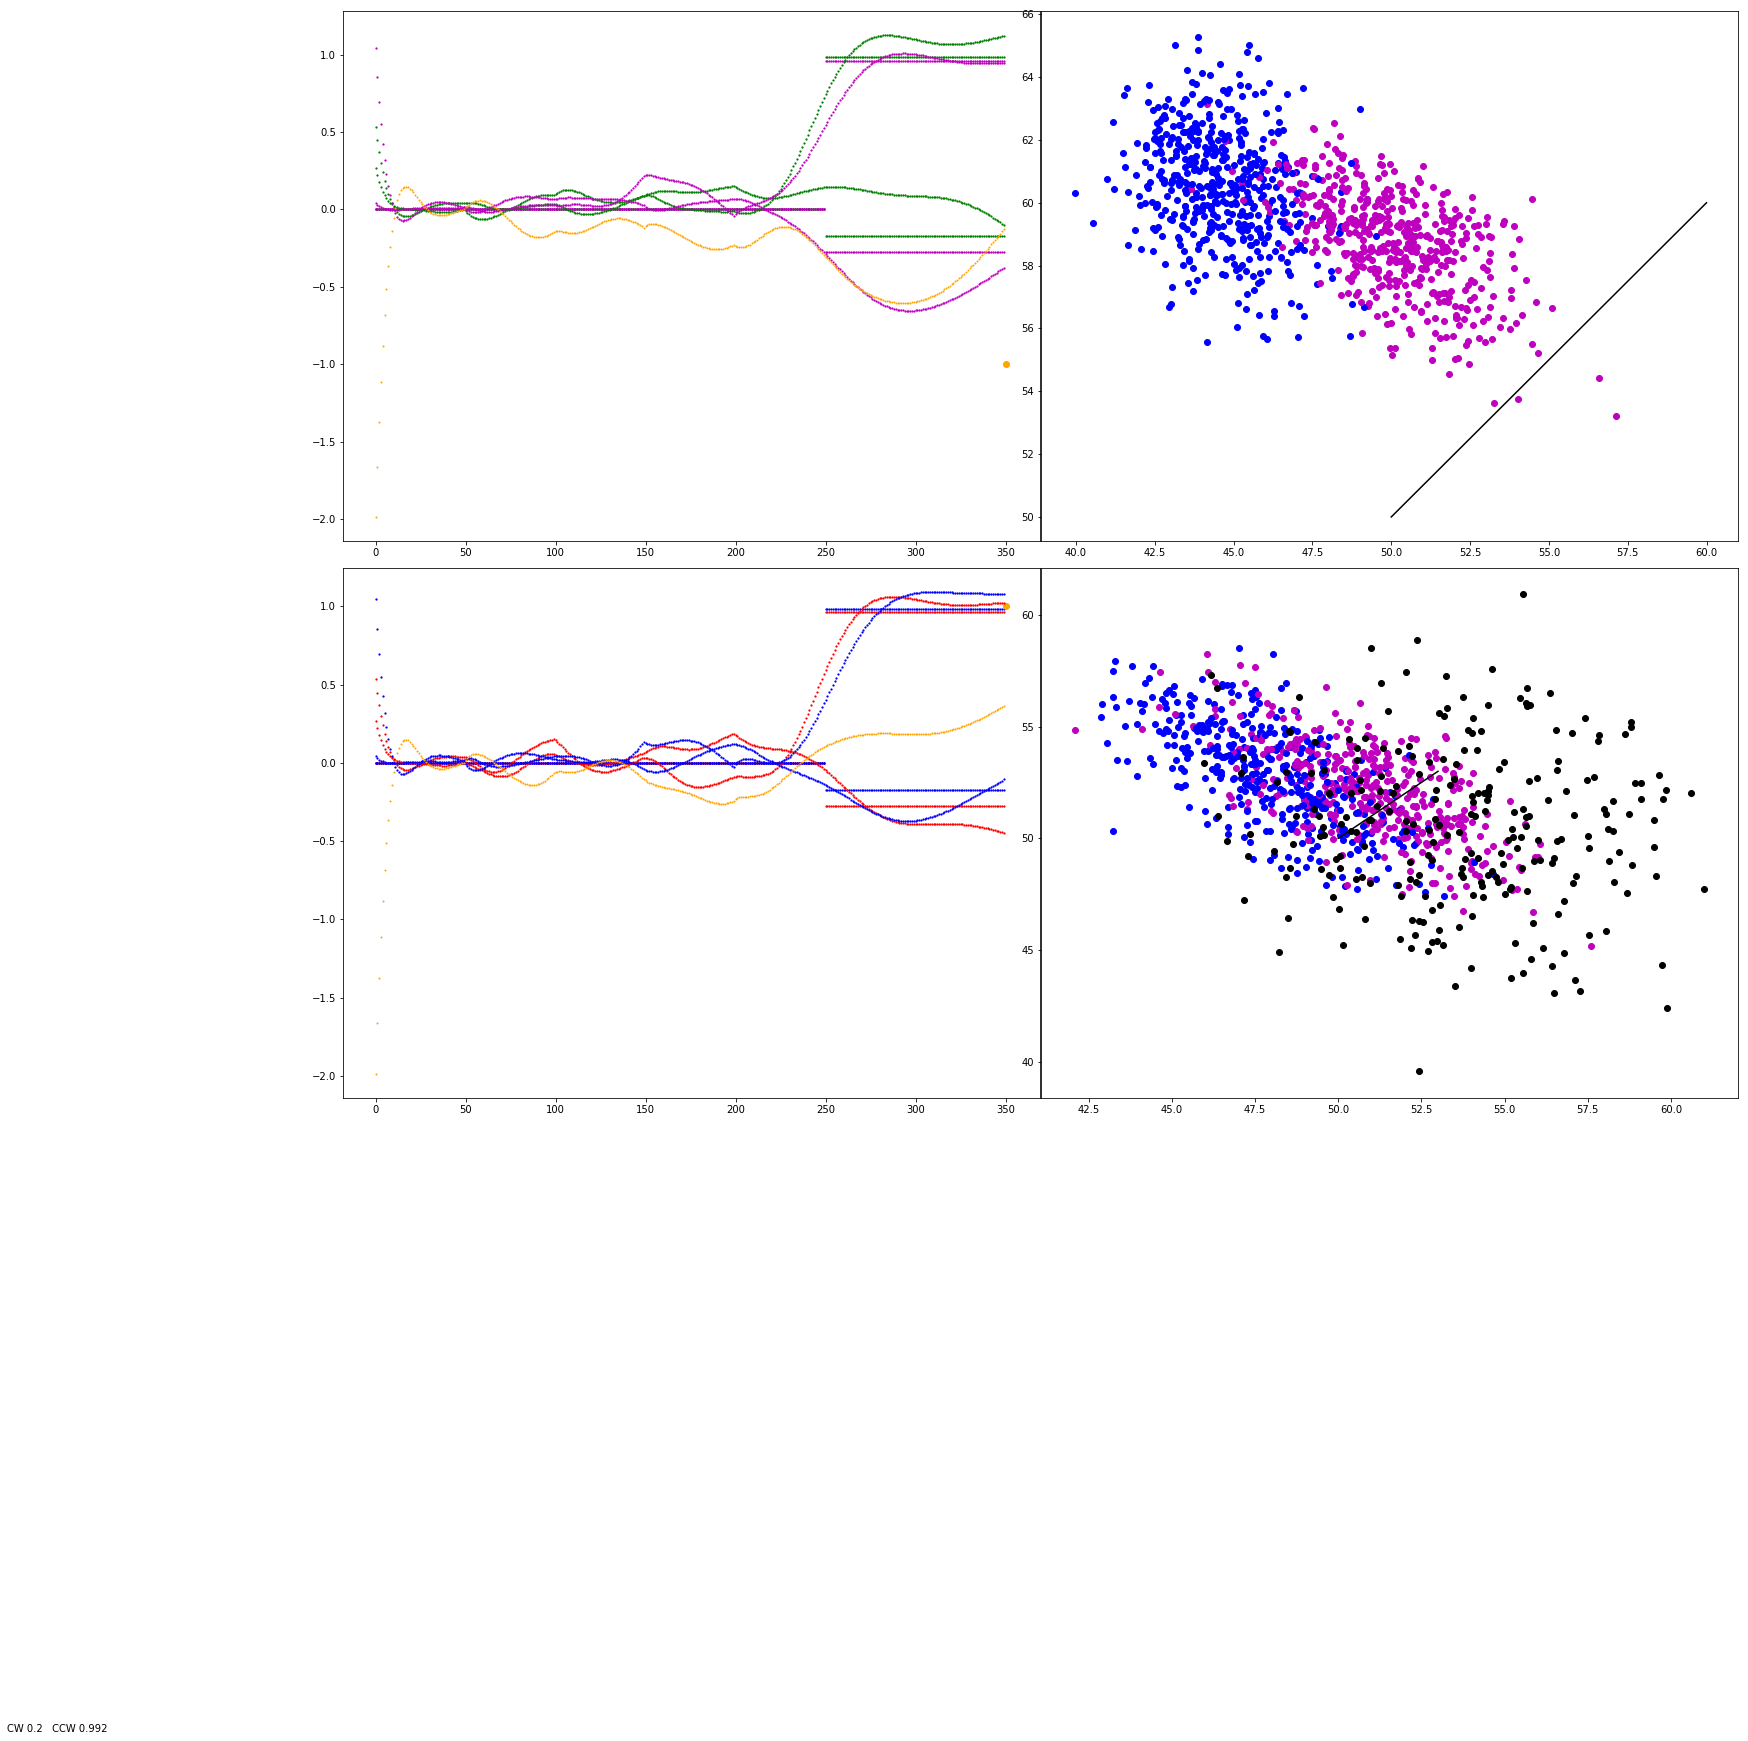

Step 200,before optimize, Minibatch Loss= 0.0647
Step 200, Minibatch Loss= 0.0620


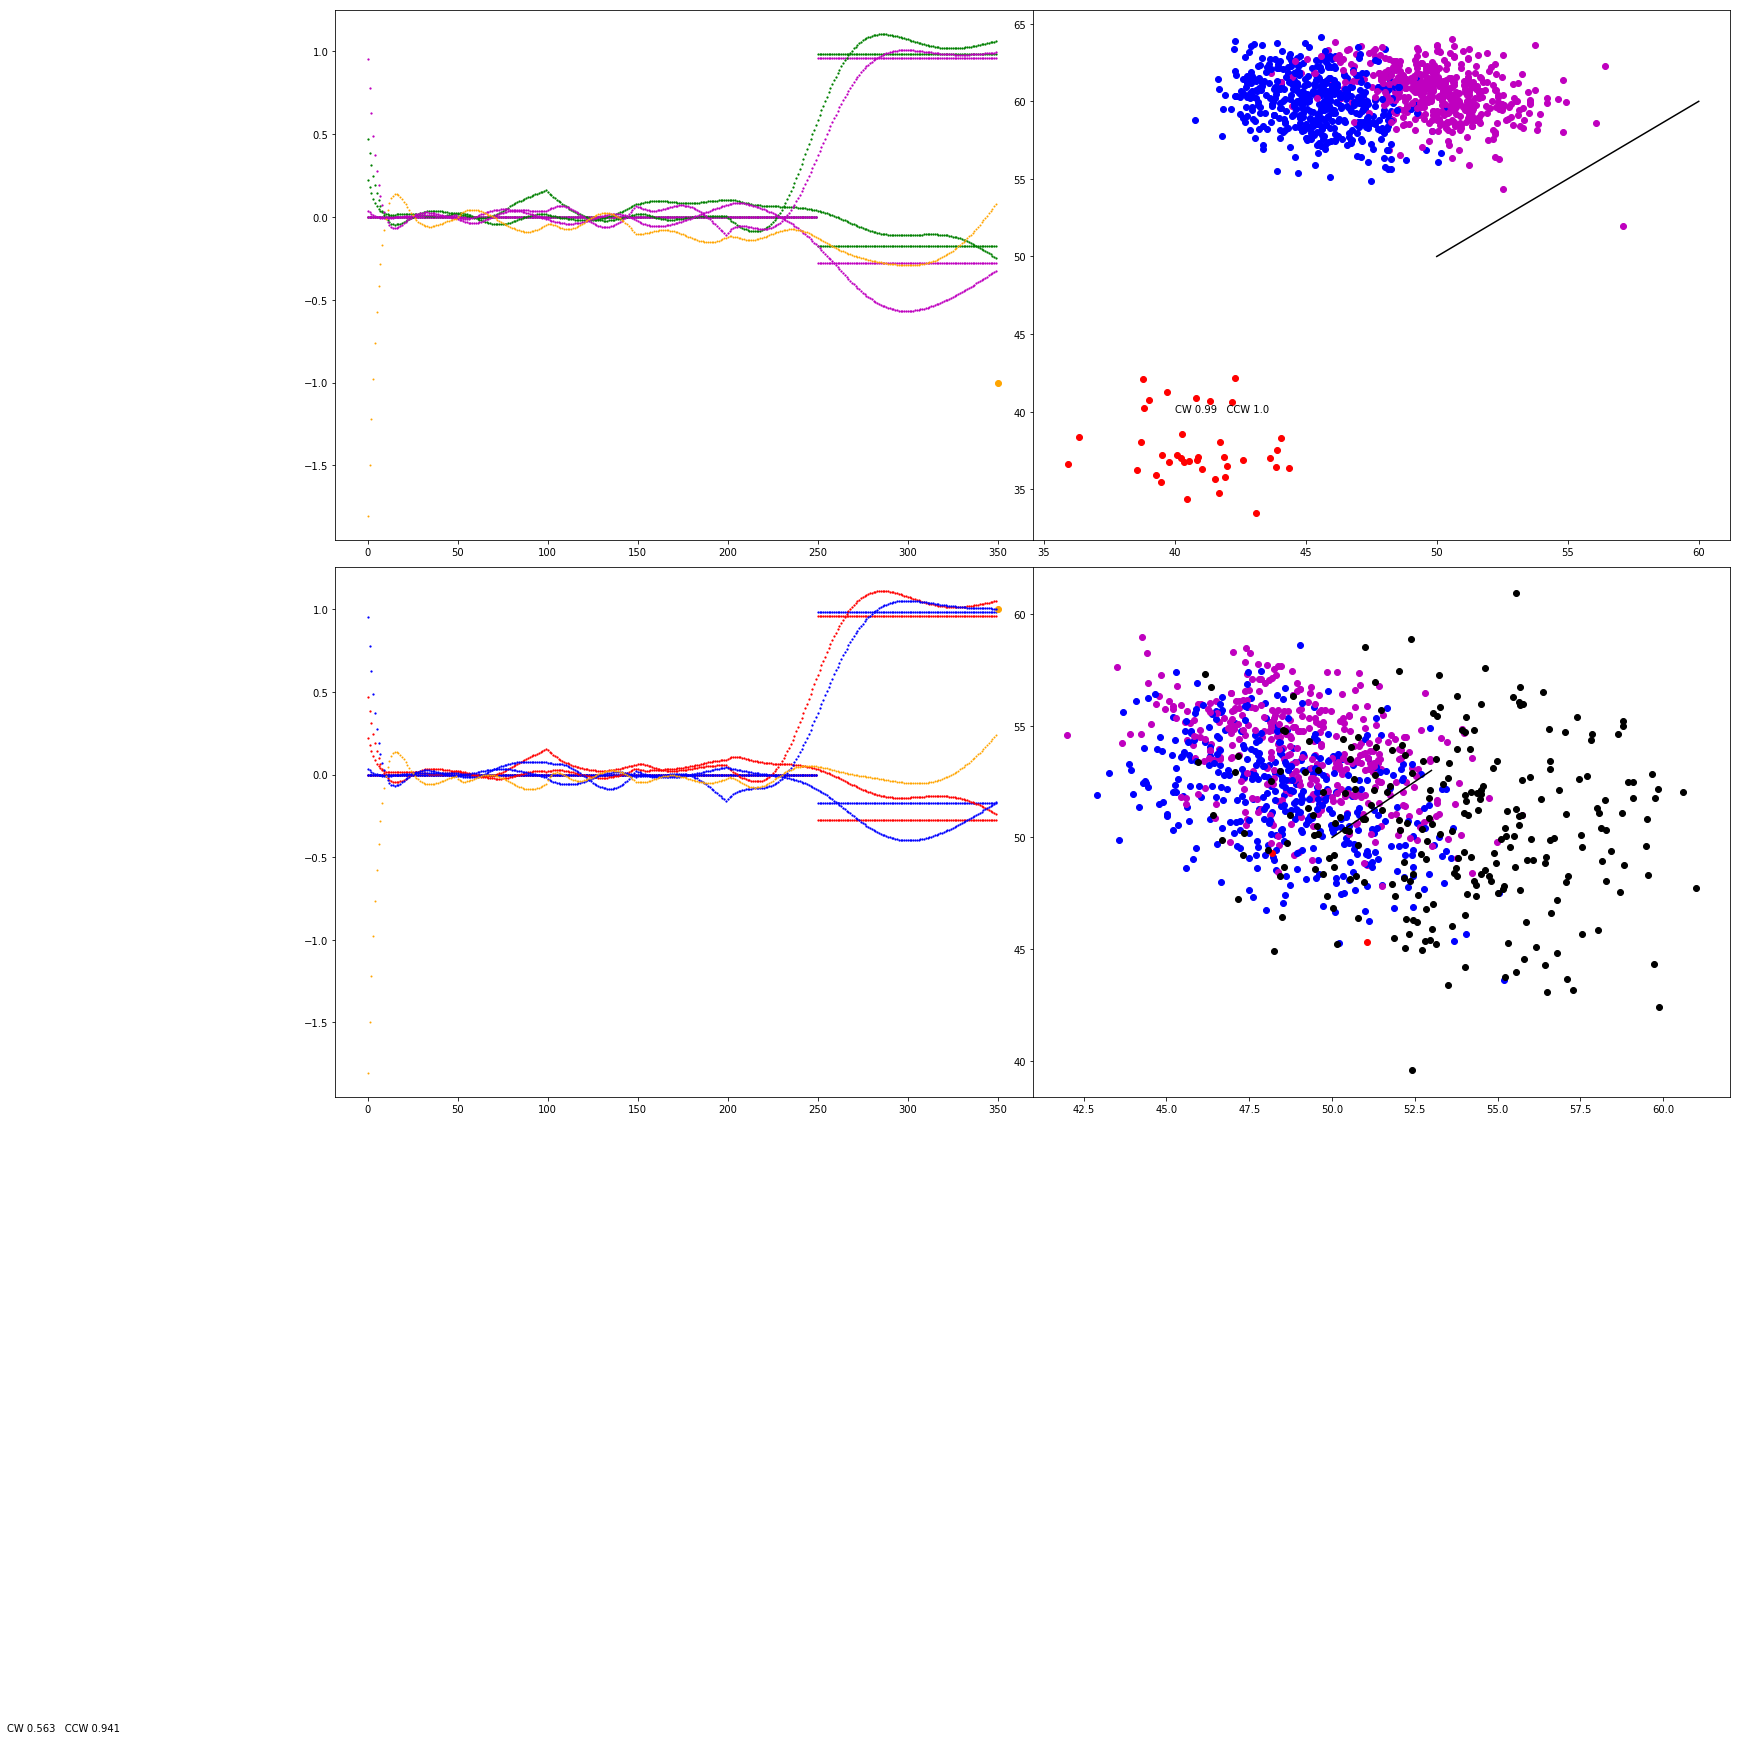

Step 250,before optimize, Minibatch Loss= 0.0404
Step 250, Minibatch Loss= 0.0392


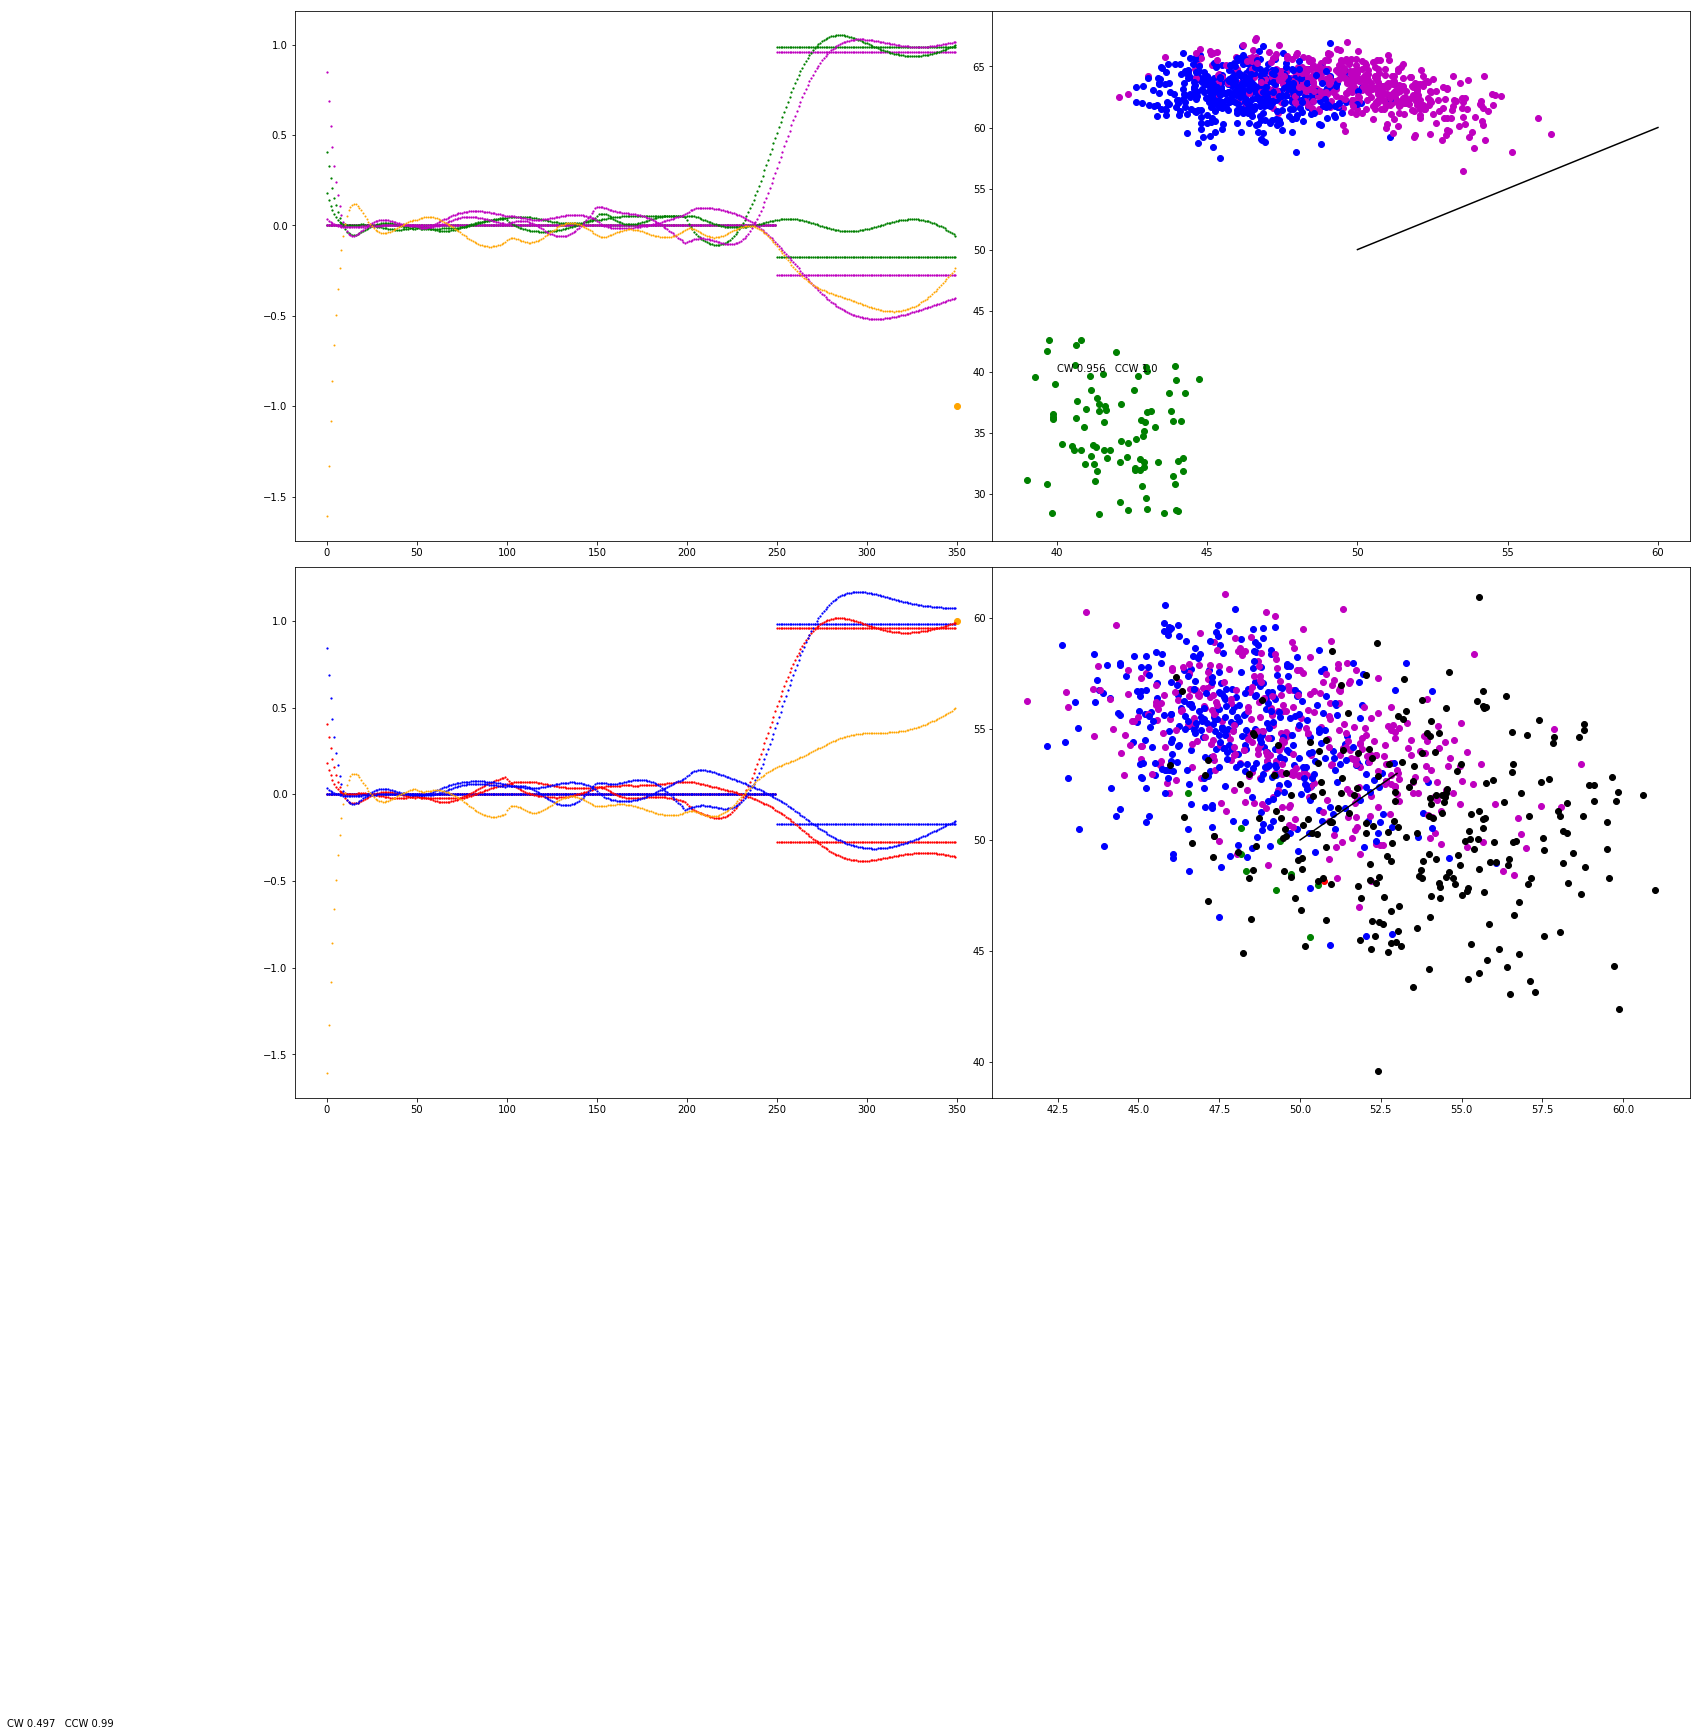

Step 300,before optimize, Minibatch Loss= 0.0264
Step 300, Minibatch Loss= 0.0255


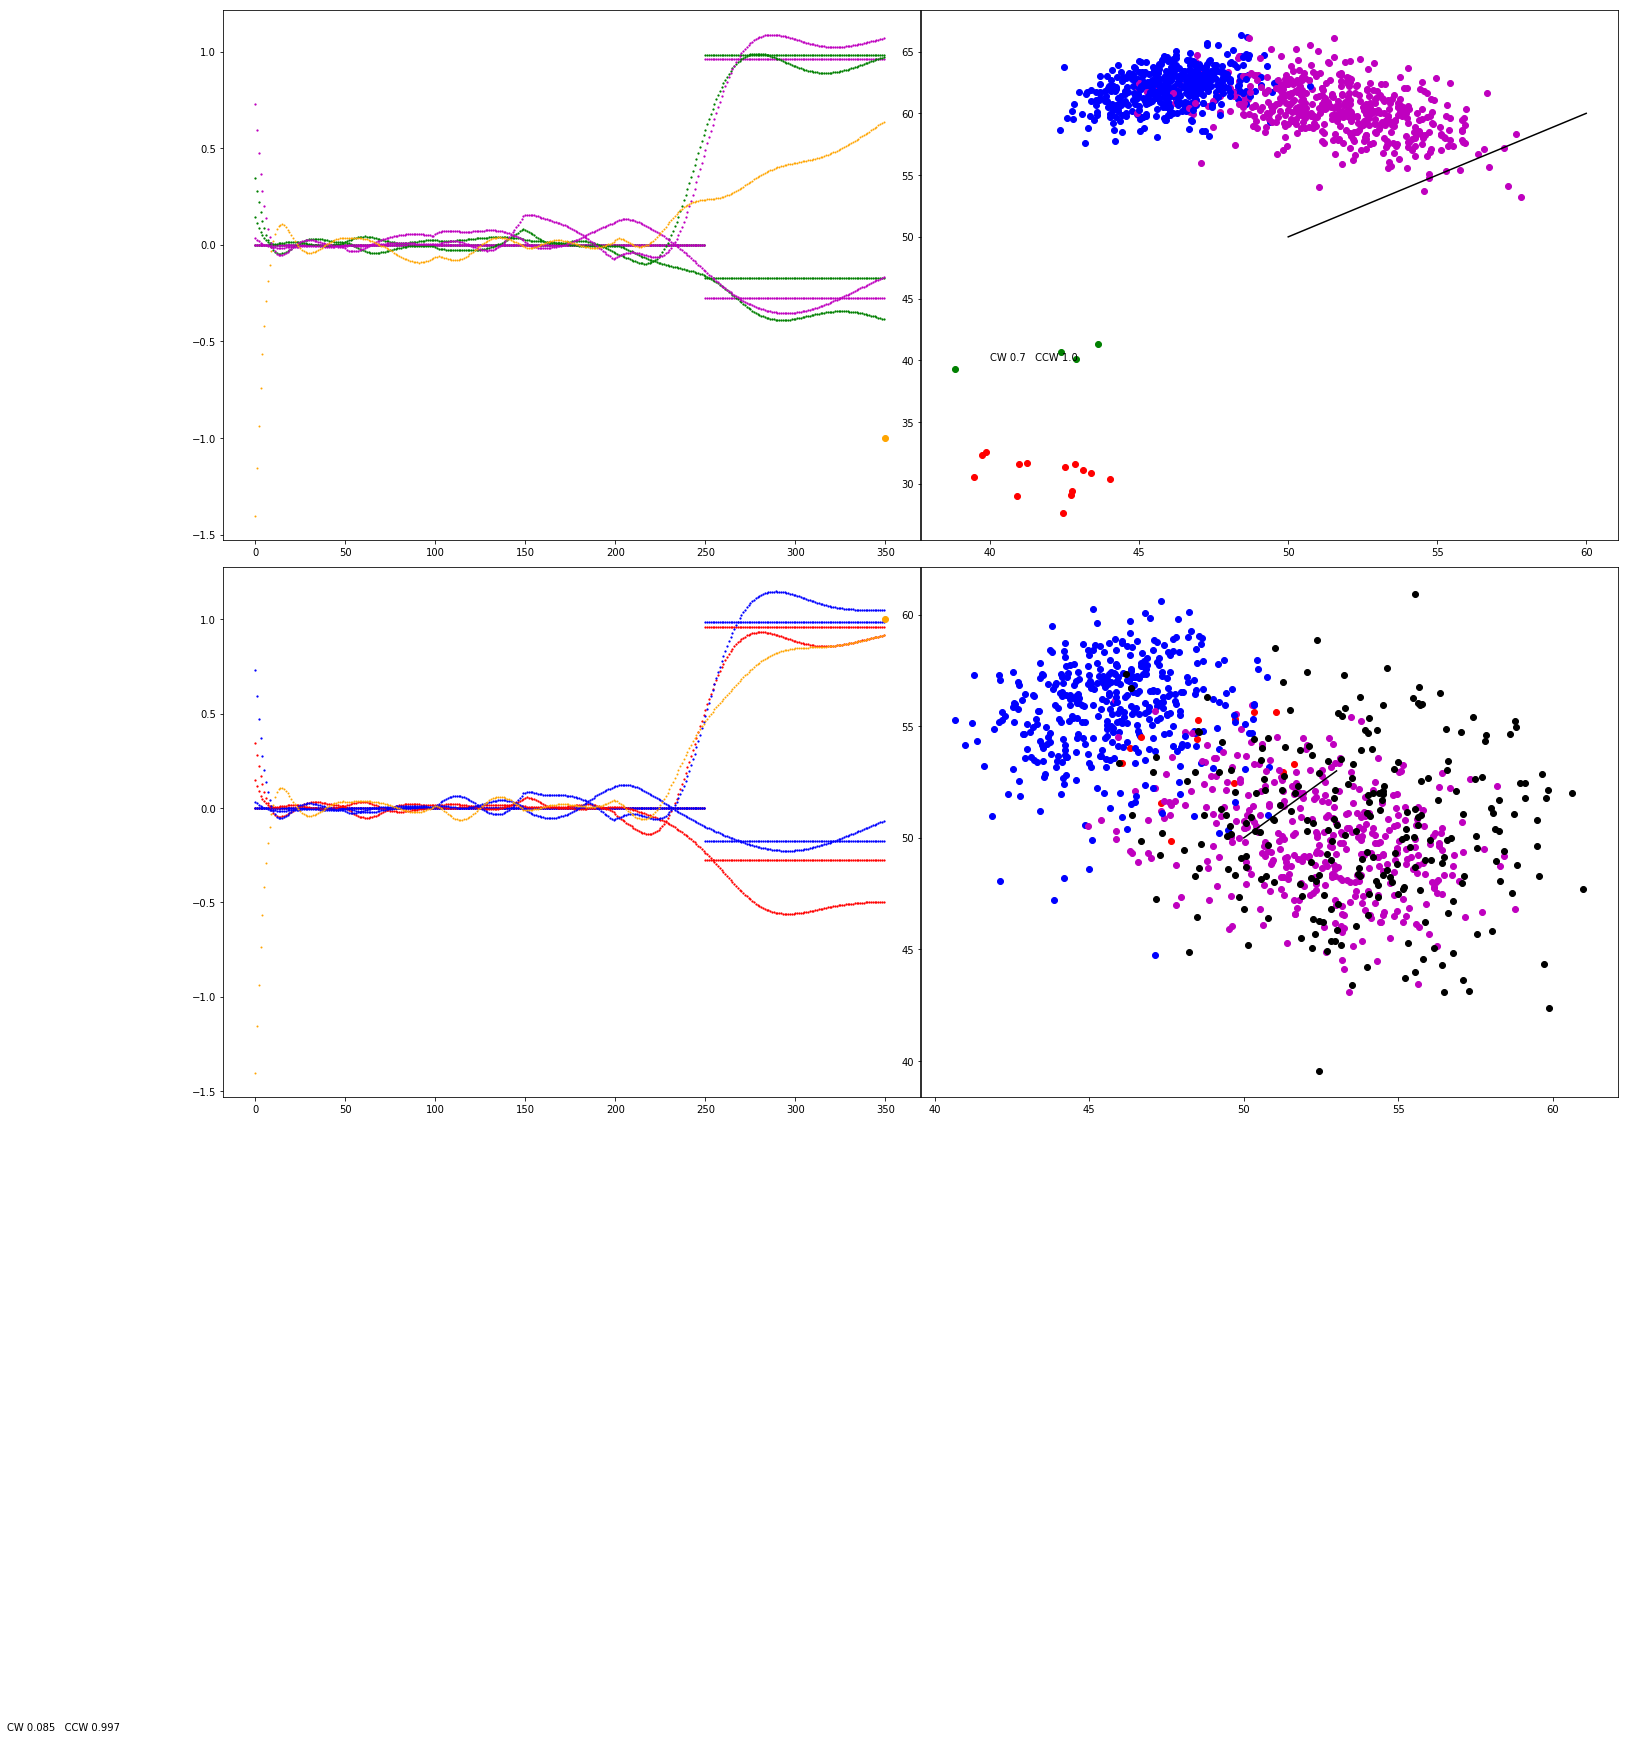

Step 350,before optimize, Minibatch Loss= 0.0175
Step 350, Minibatch Loss= 0.0170


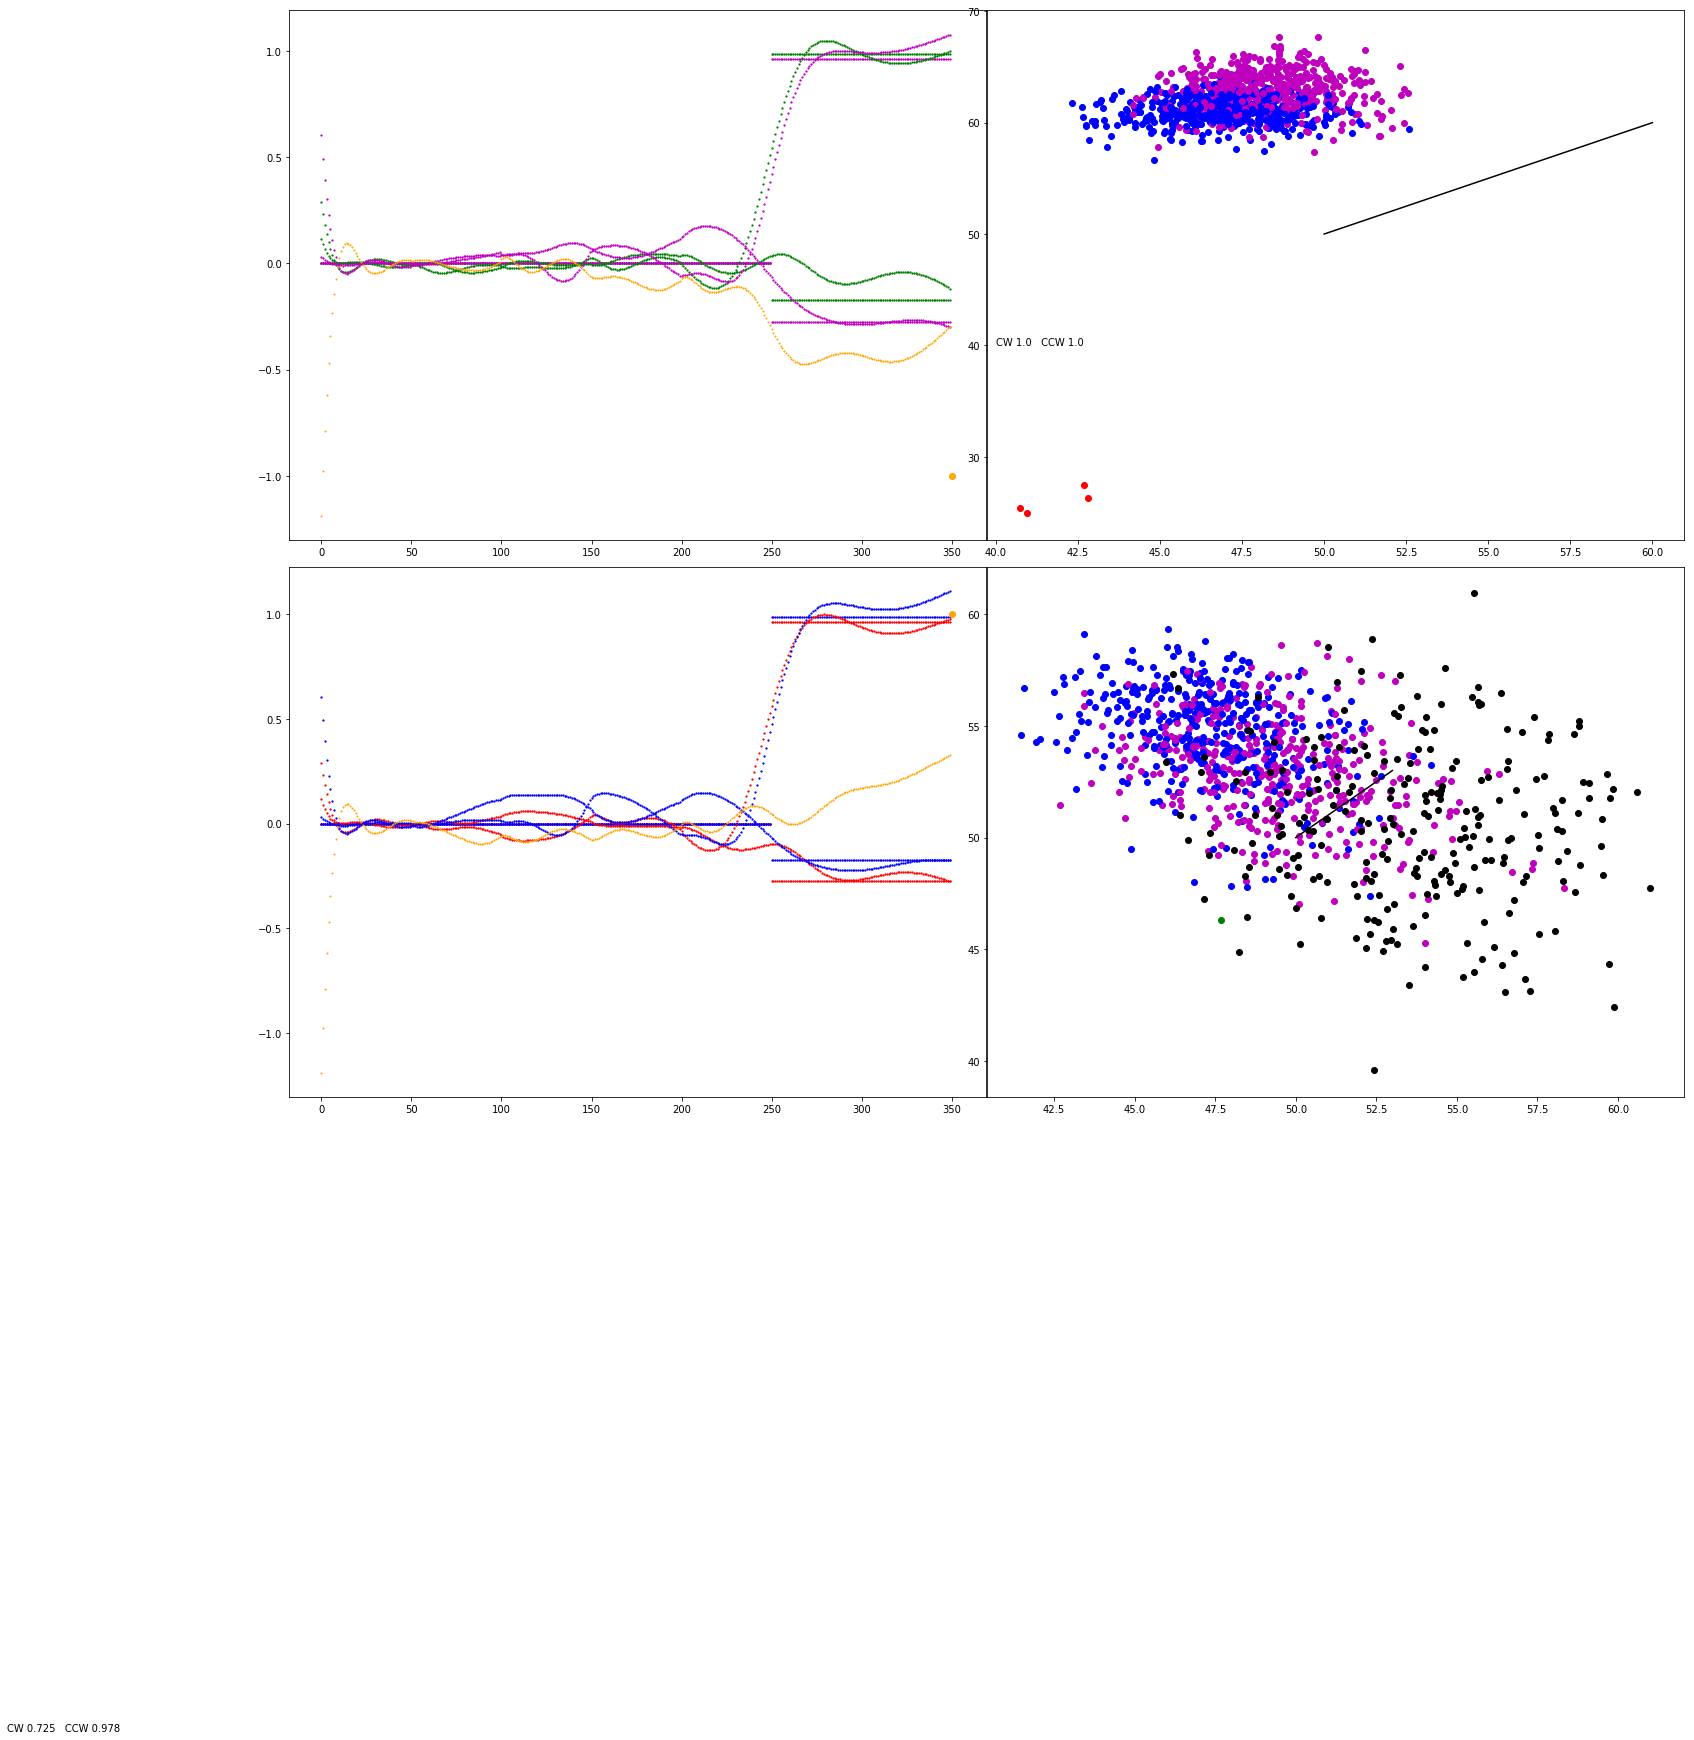

Step 400,before optimize, Minibatch Loss= 0.0126
Step 400, Minibatch Loss= 0.0119


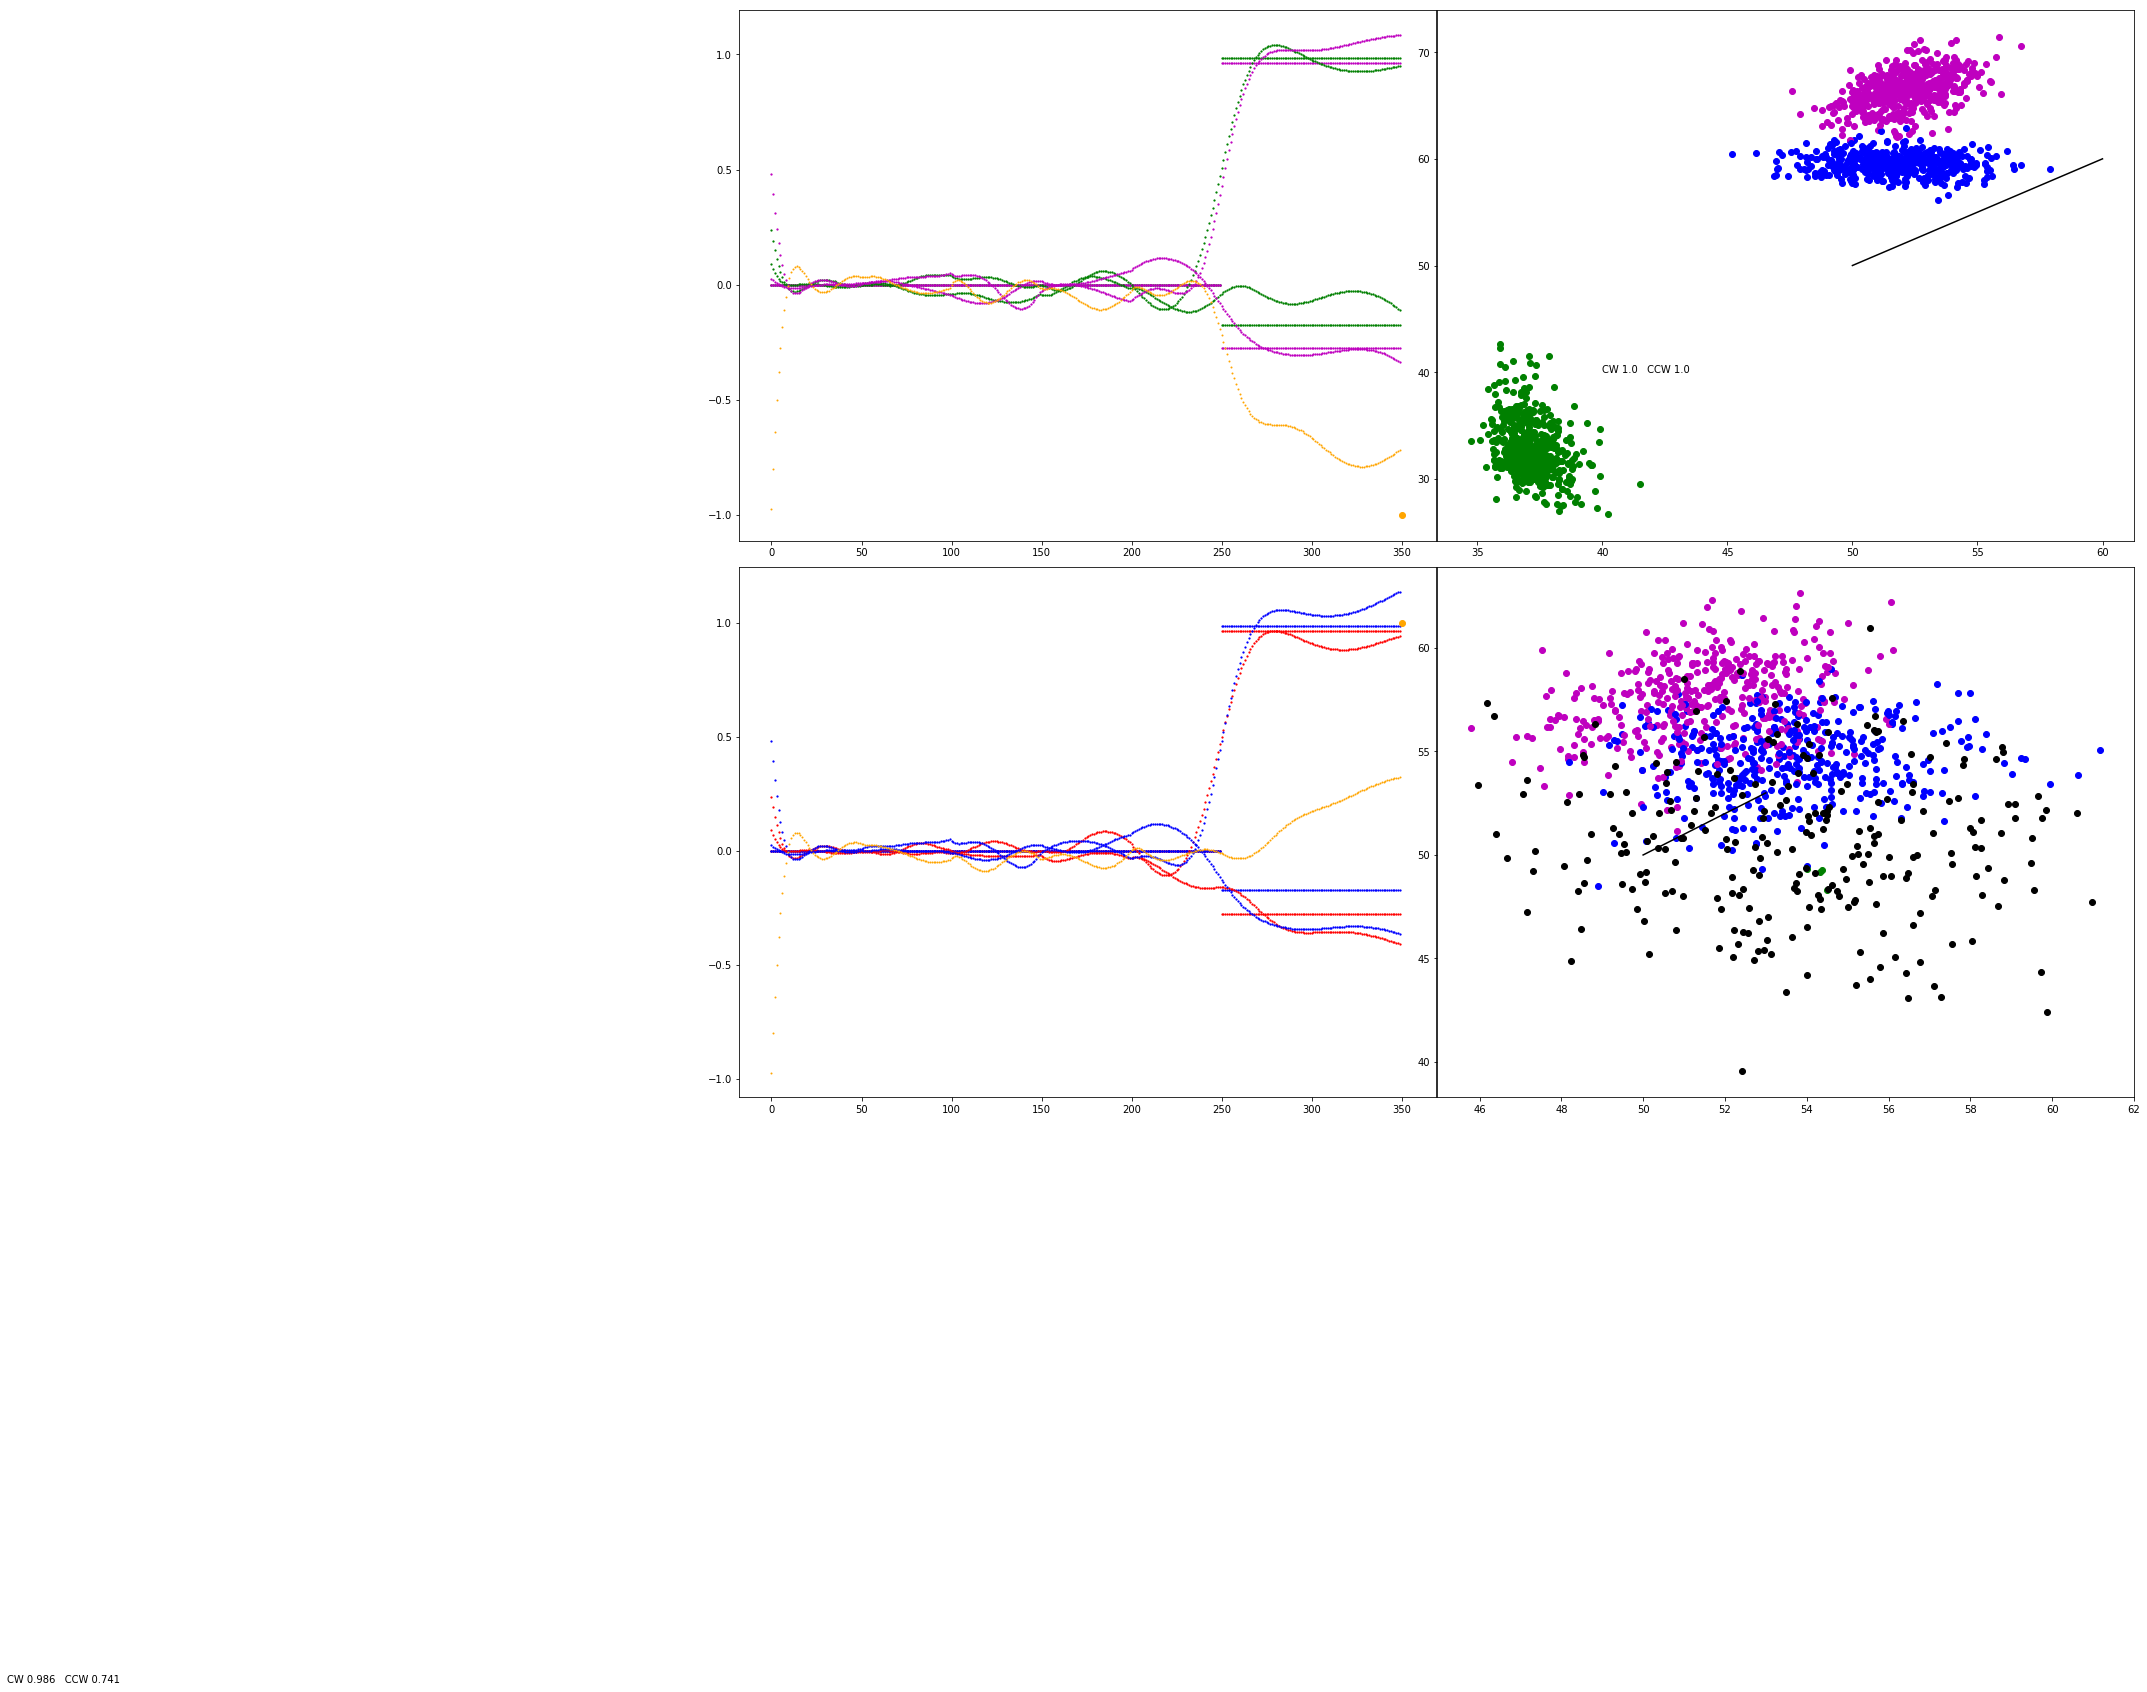

Step 450,before optimize, Minibatch Loss= 0.0093
Step 450, Minibatch Loss= 0.0087


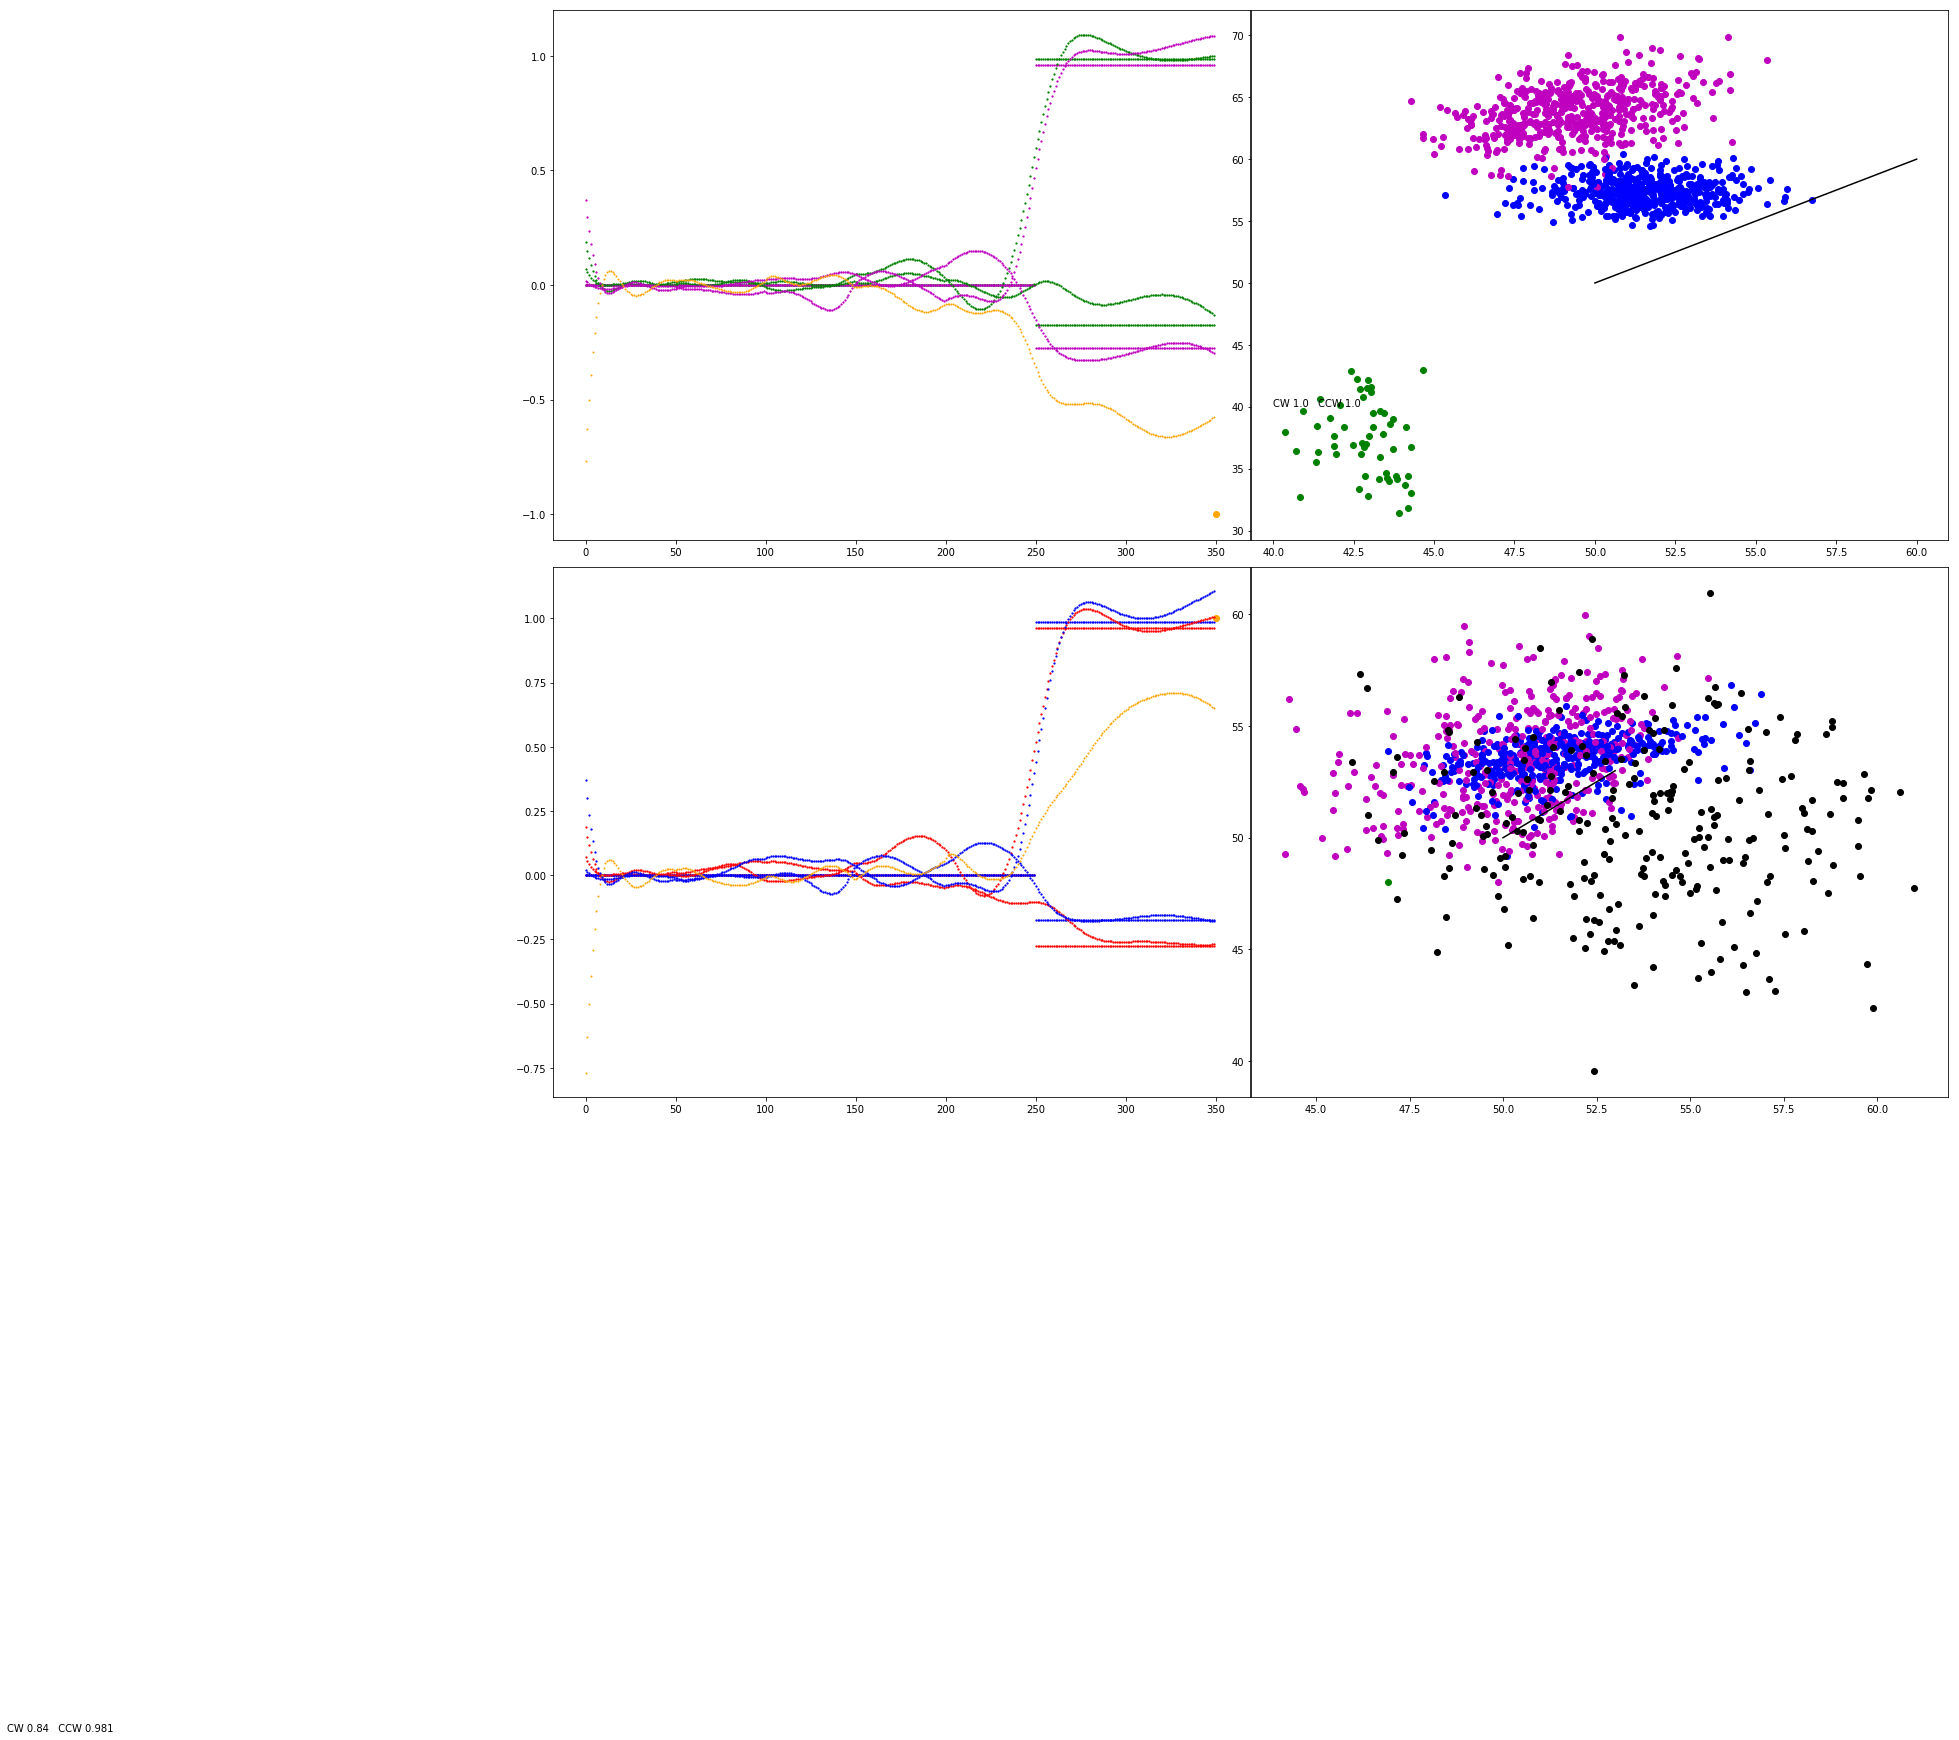

Step 500,before optimize, Minibatch Loss= 0.0093
Step 500, Minibatch Loss= 0.0541


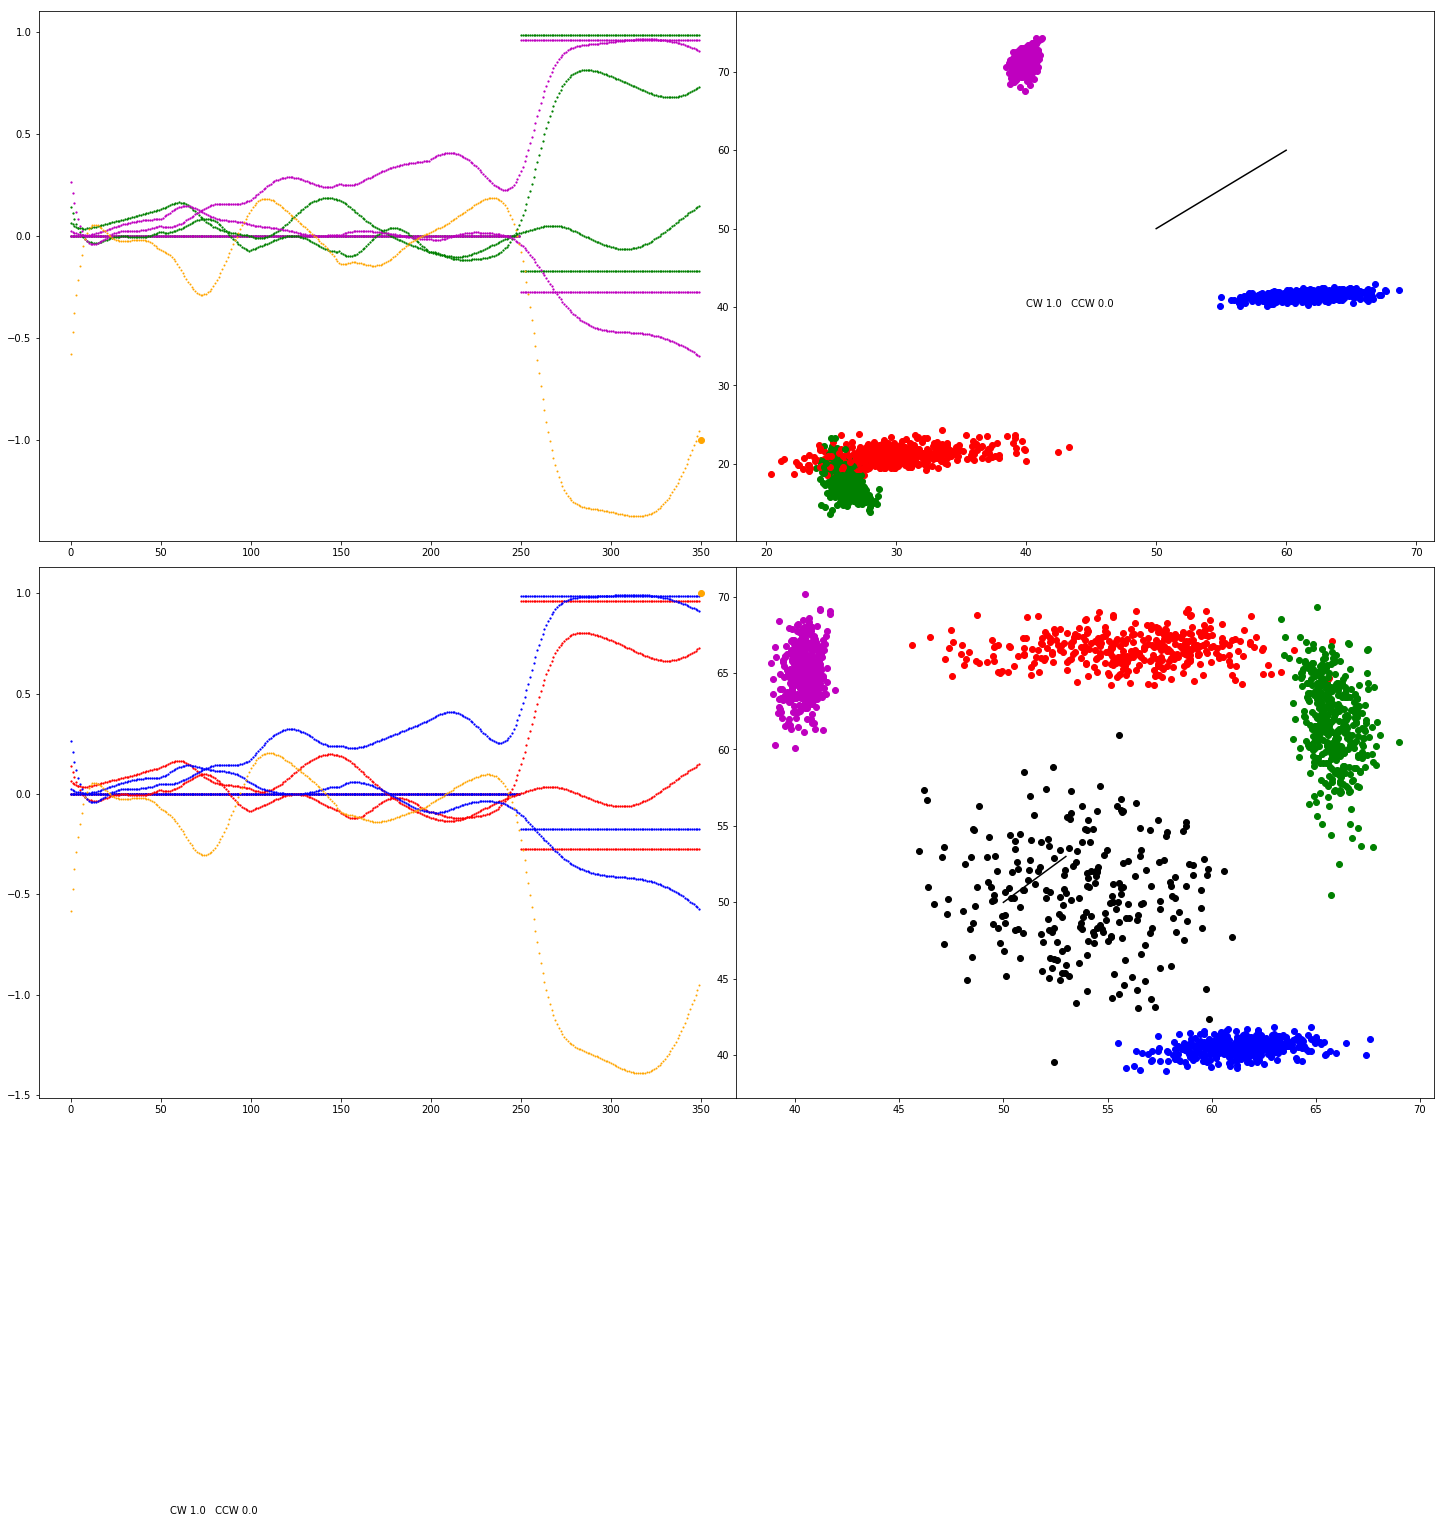

Step 550,before optimize, Minibatch Loss= 0.0069
Step 550, Minibatch Loss= 0.0065


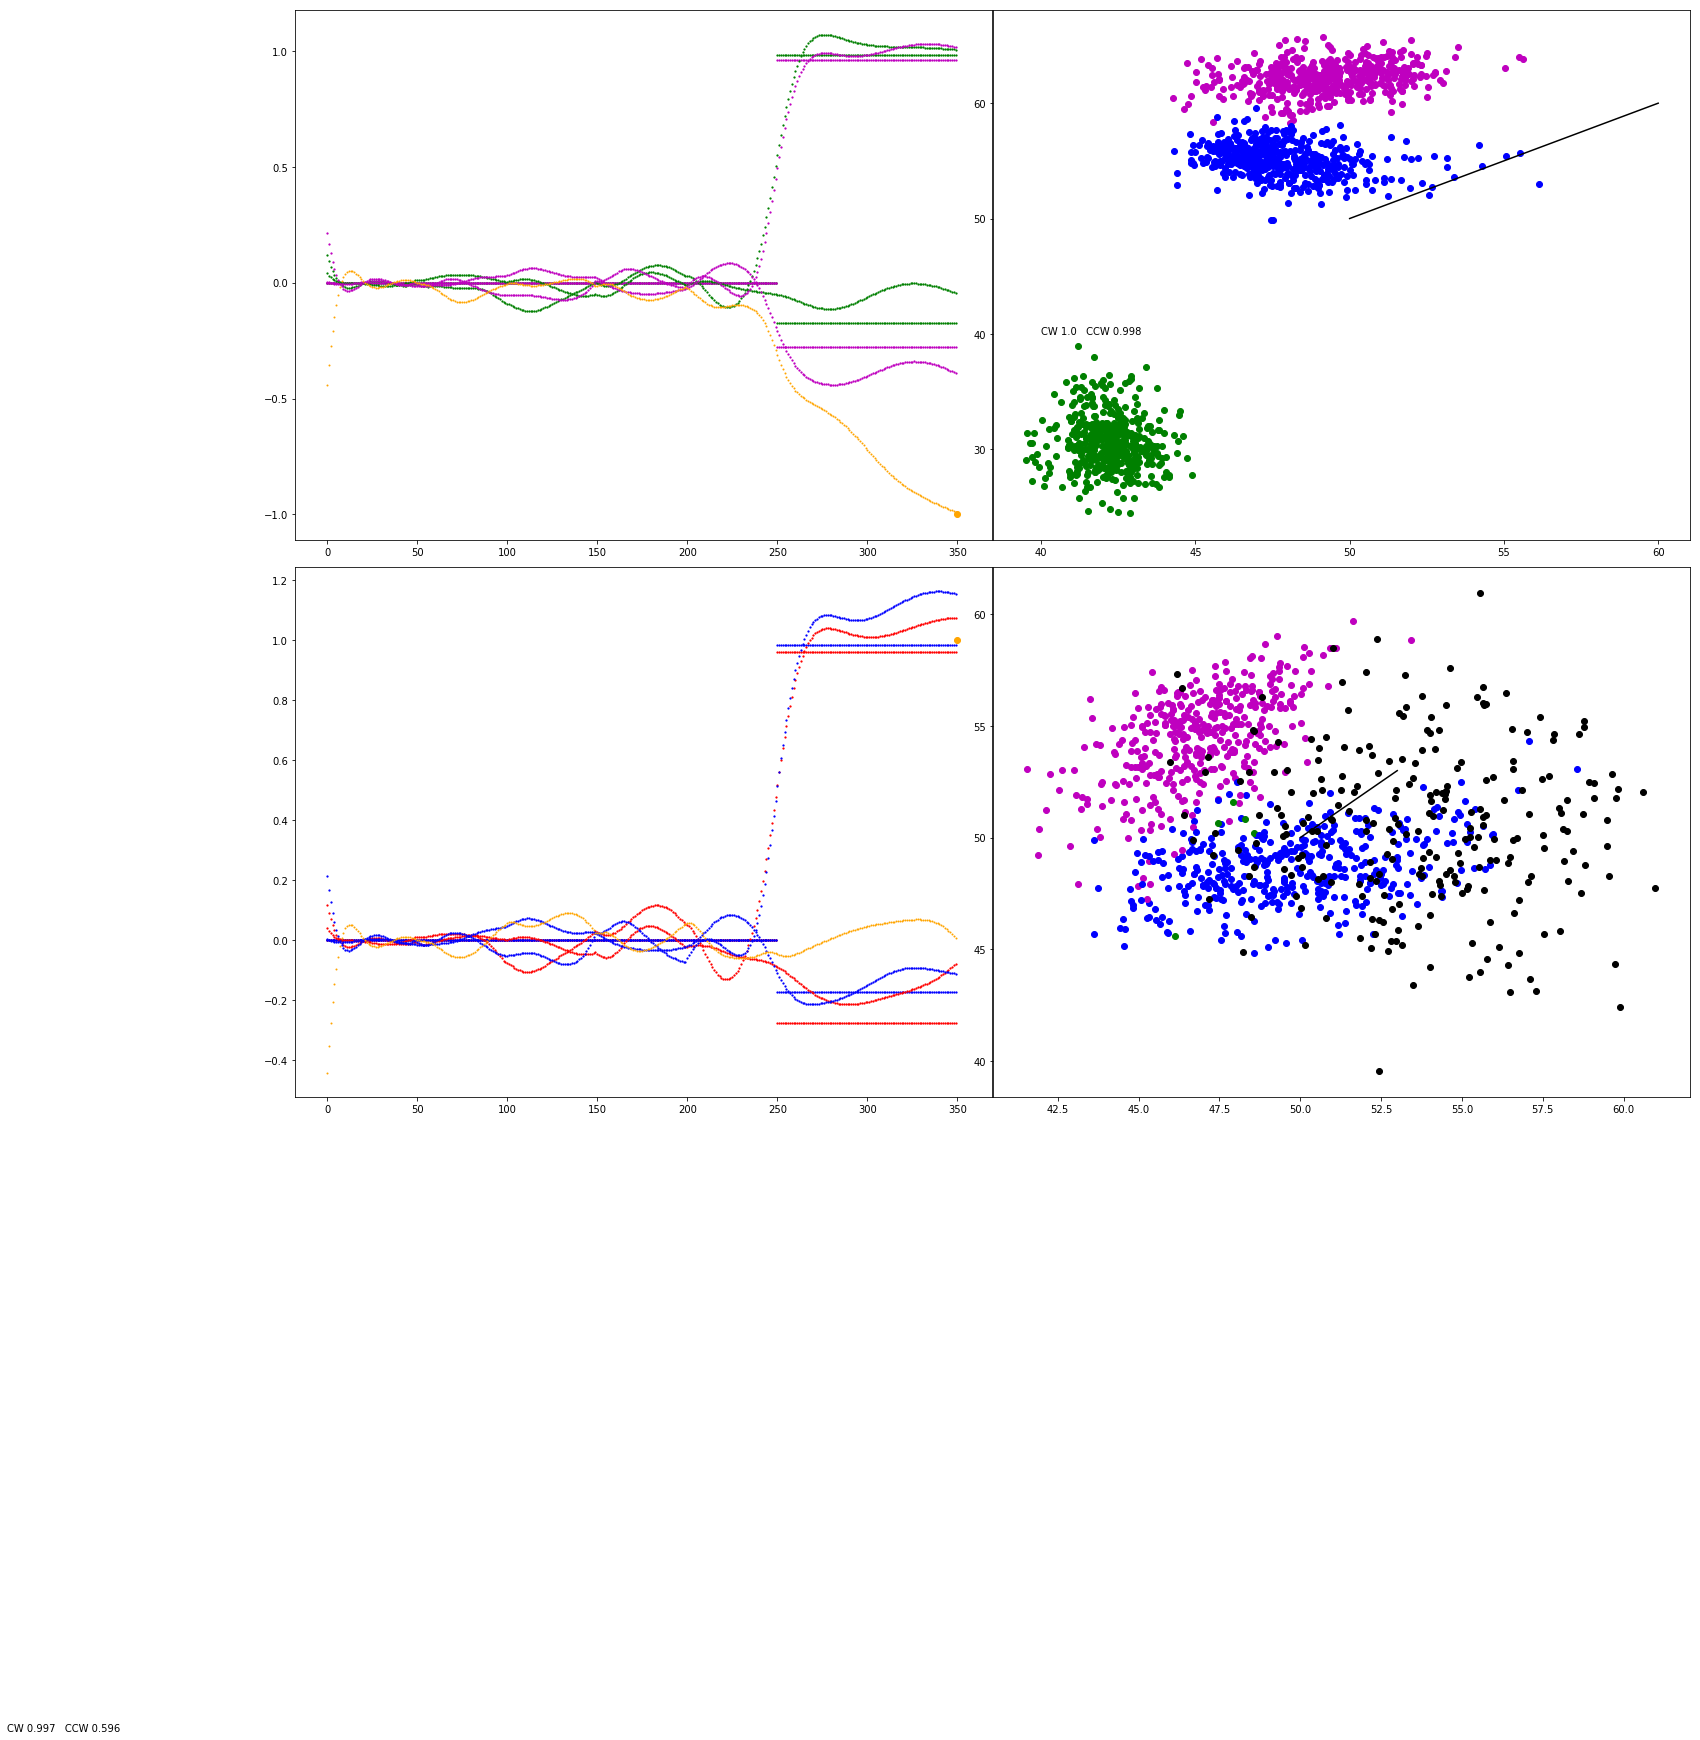

Step 600,before optimize, Minibatch Loss= 0.0058
Step 600, Minibatch Loss= 0.0053


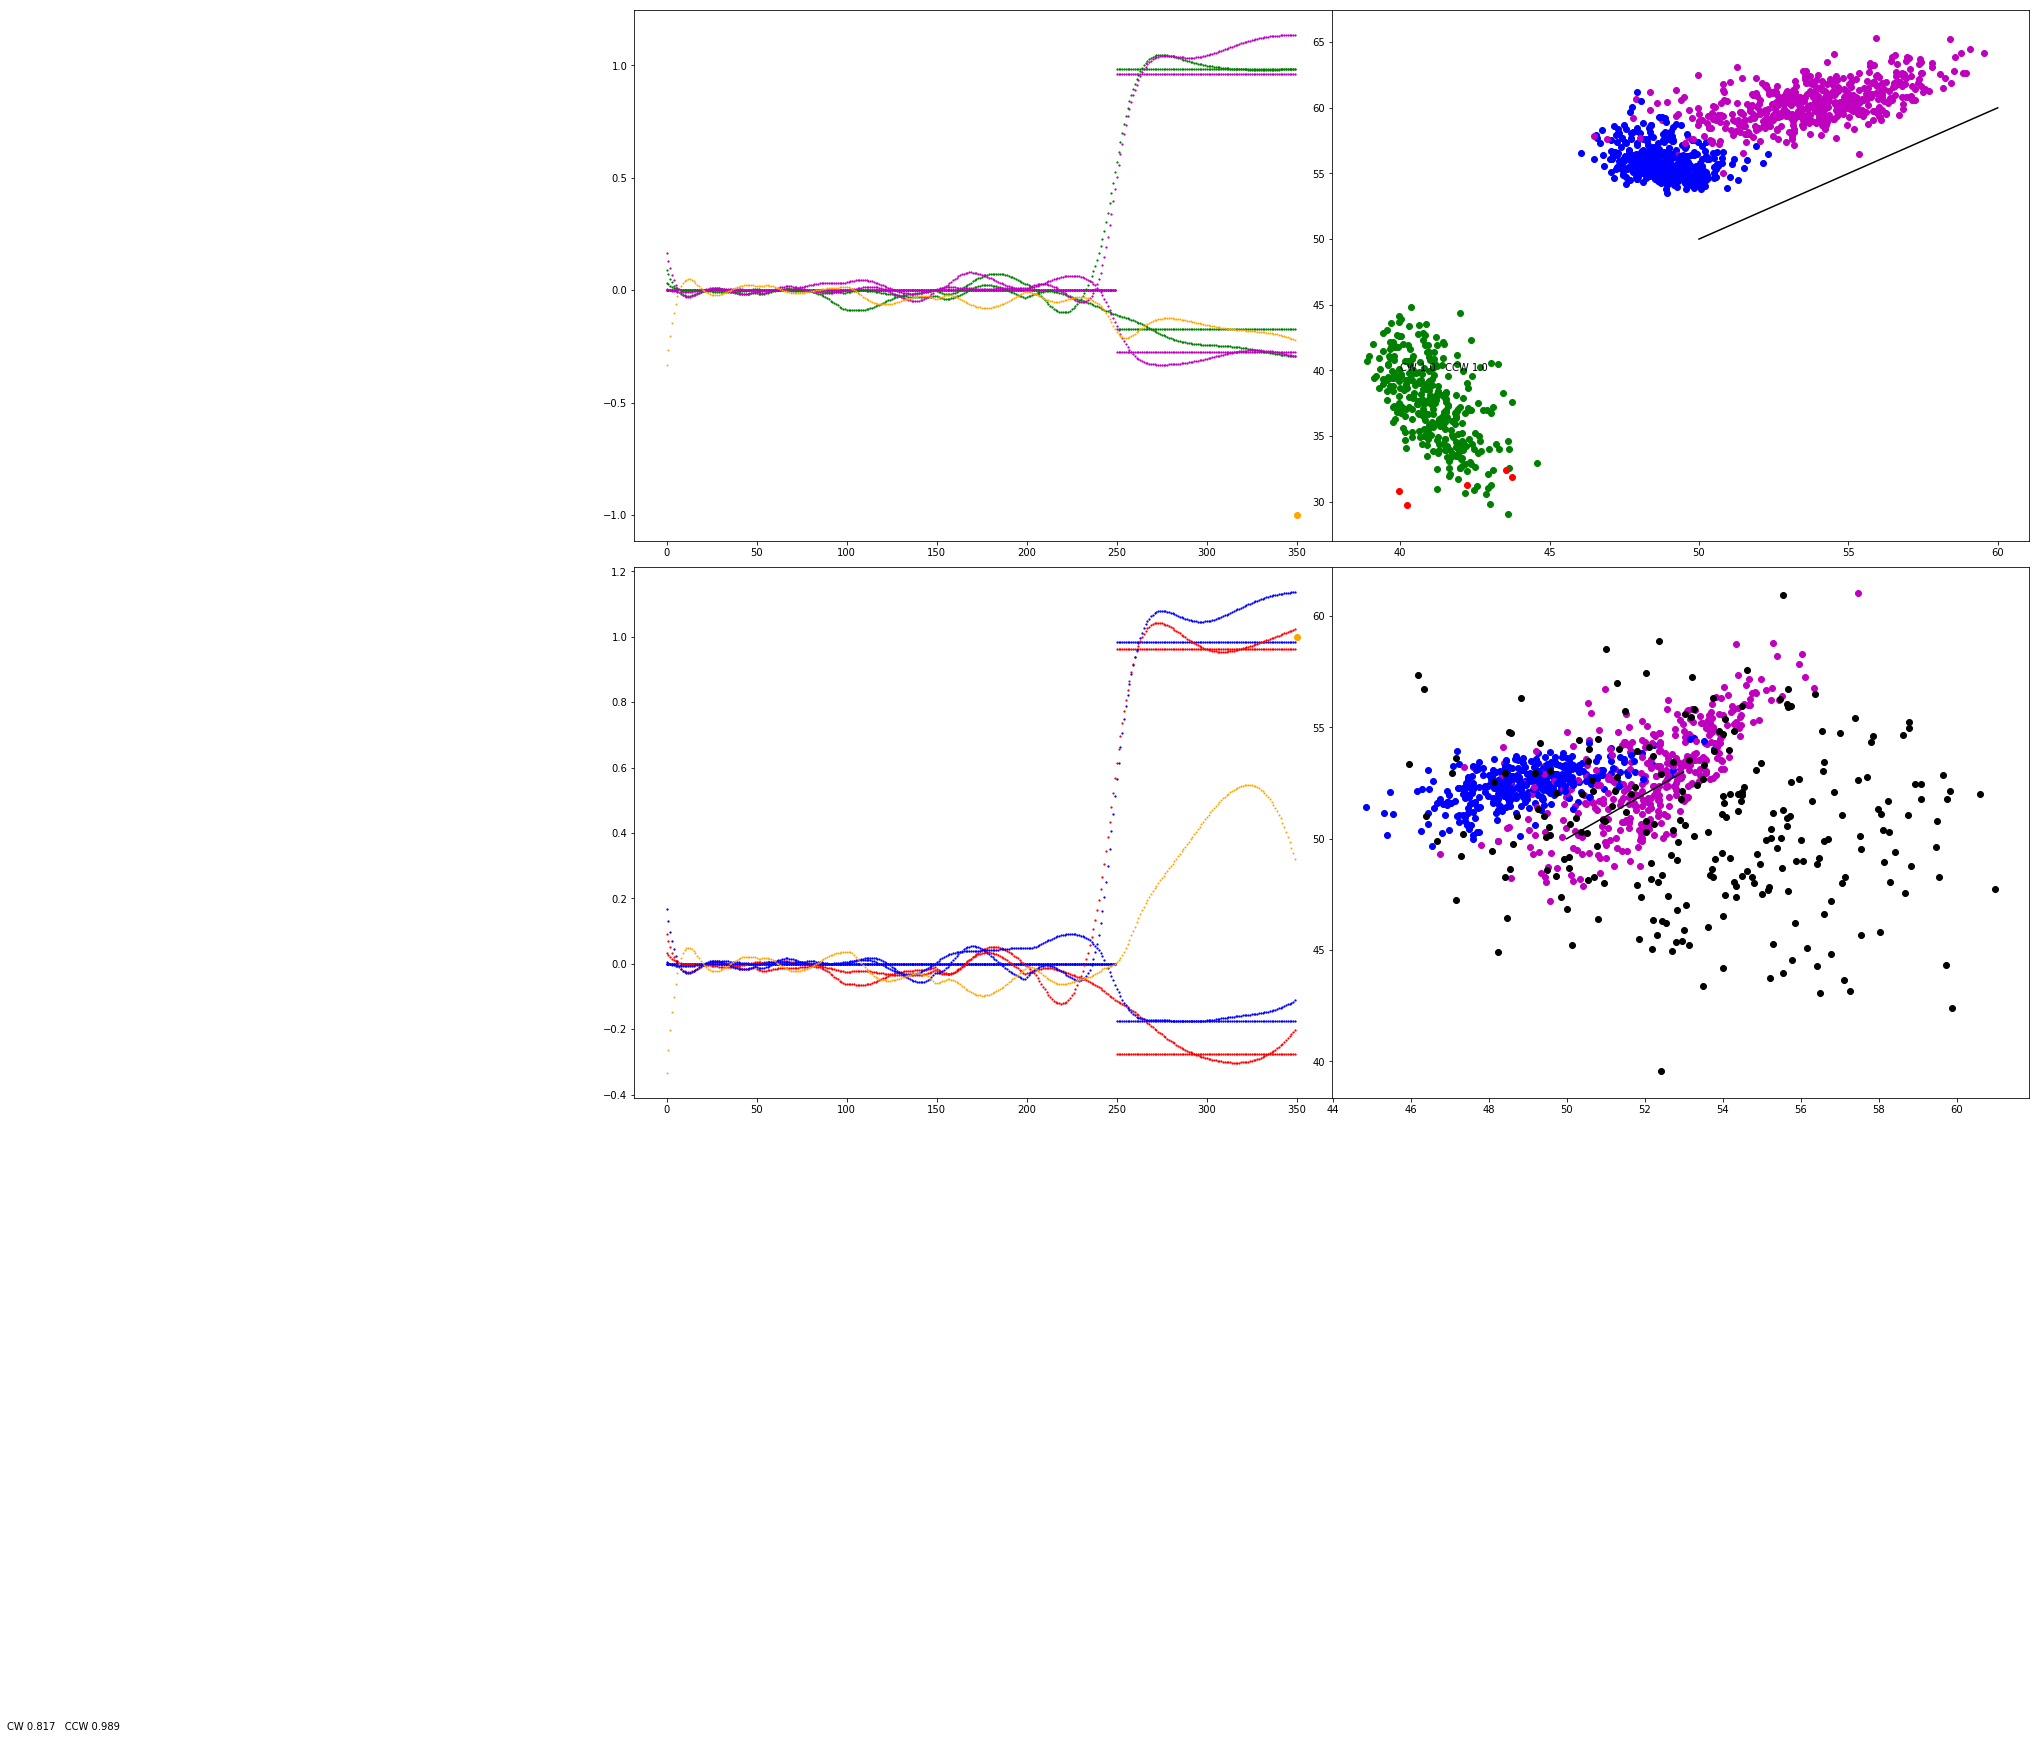

Step 650,before optimize, Minibatch Loss= 0.0055
Step 650, Minibatch Loss= 0.0048


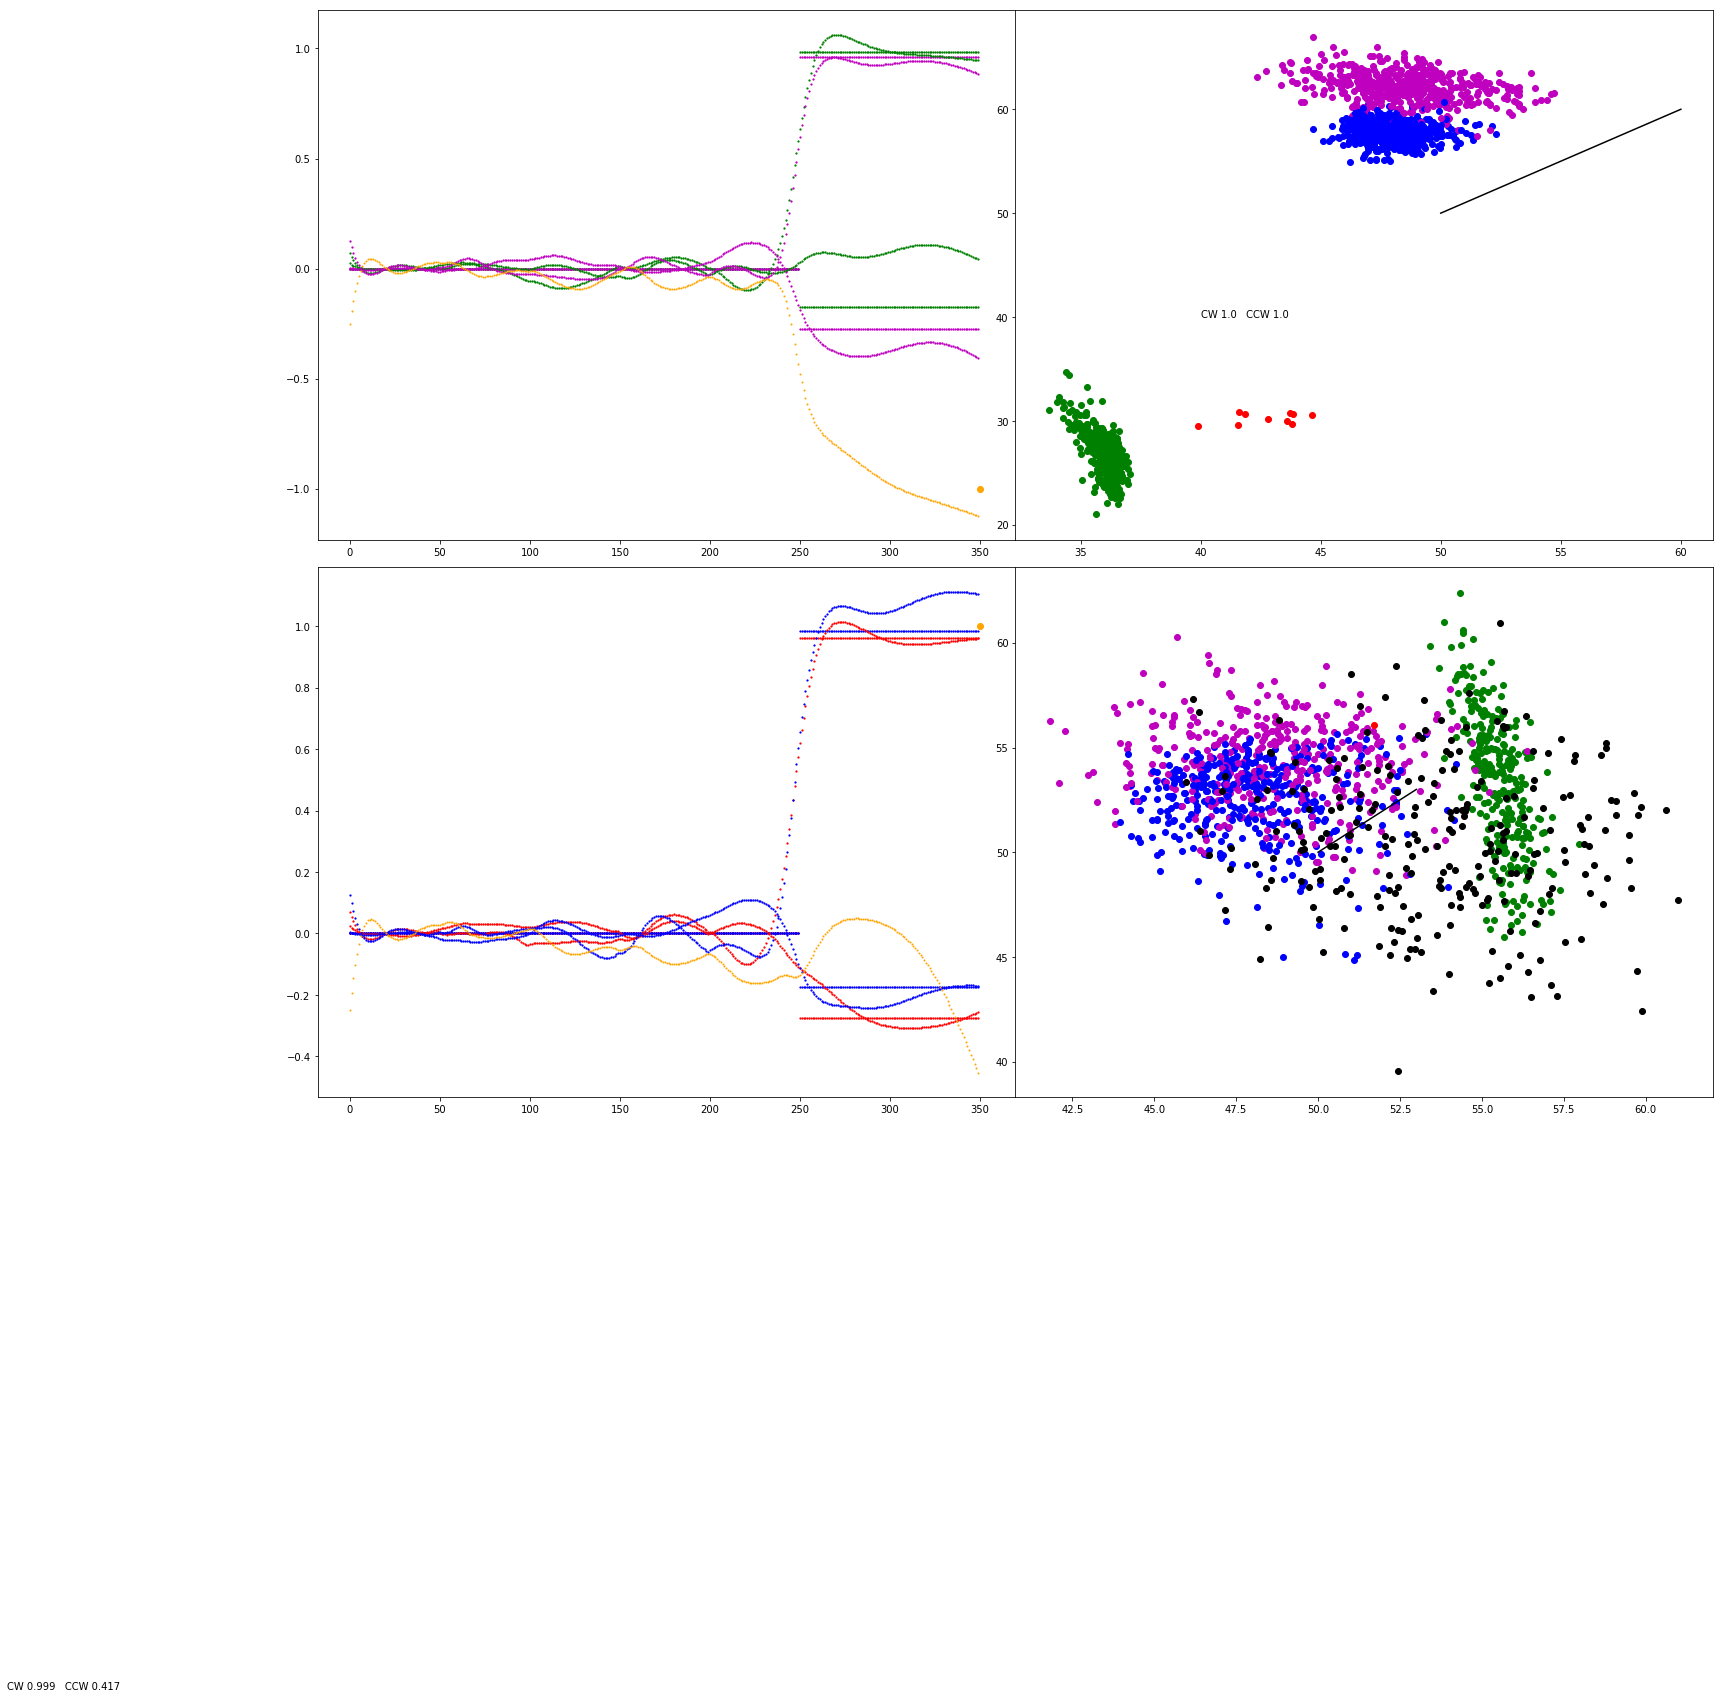

Step 700,before optimize, Minibatch Loss= 0.0066
Step 700, Minibatch Loss= 0.0059


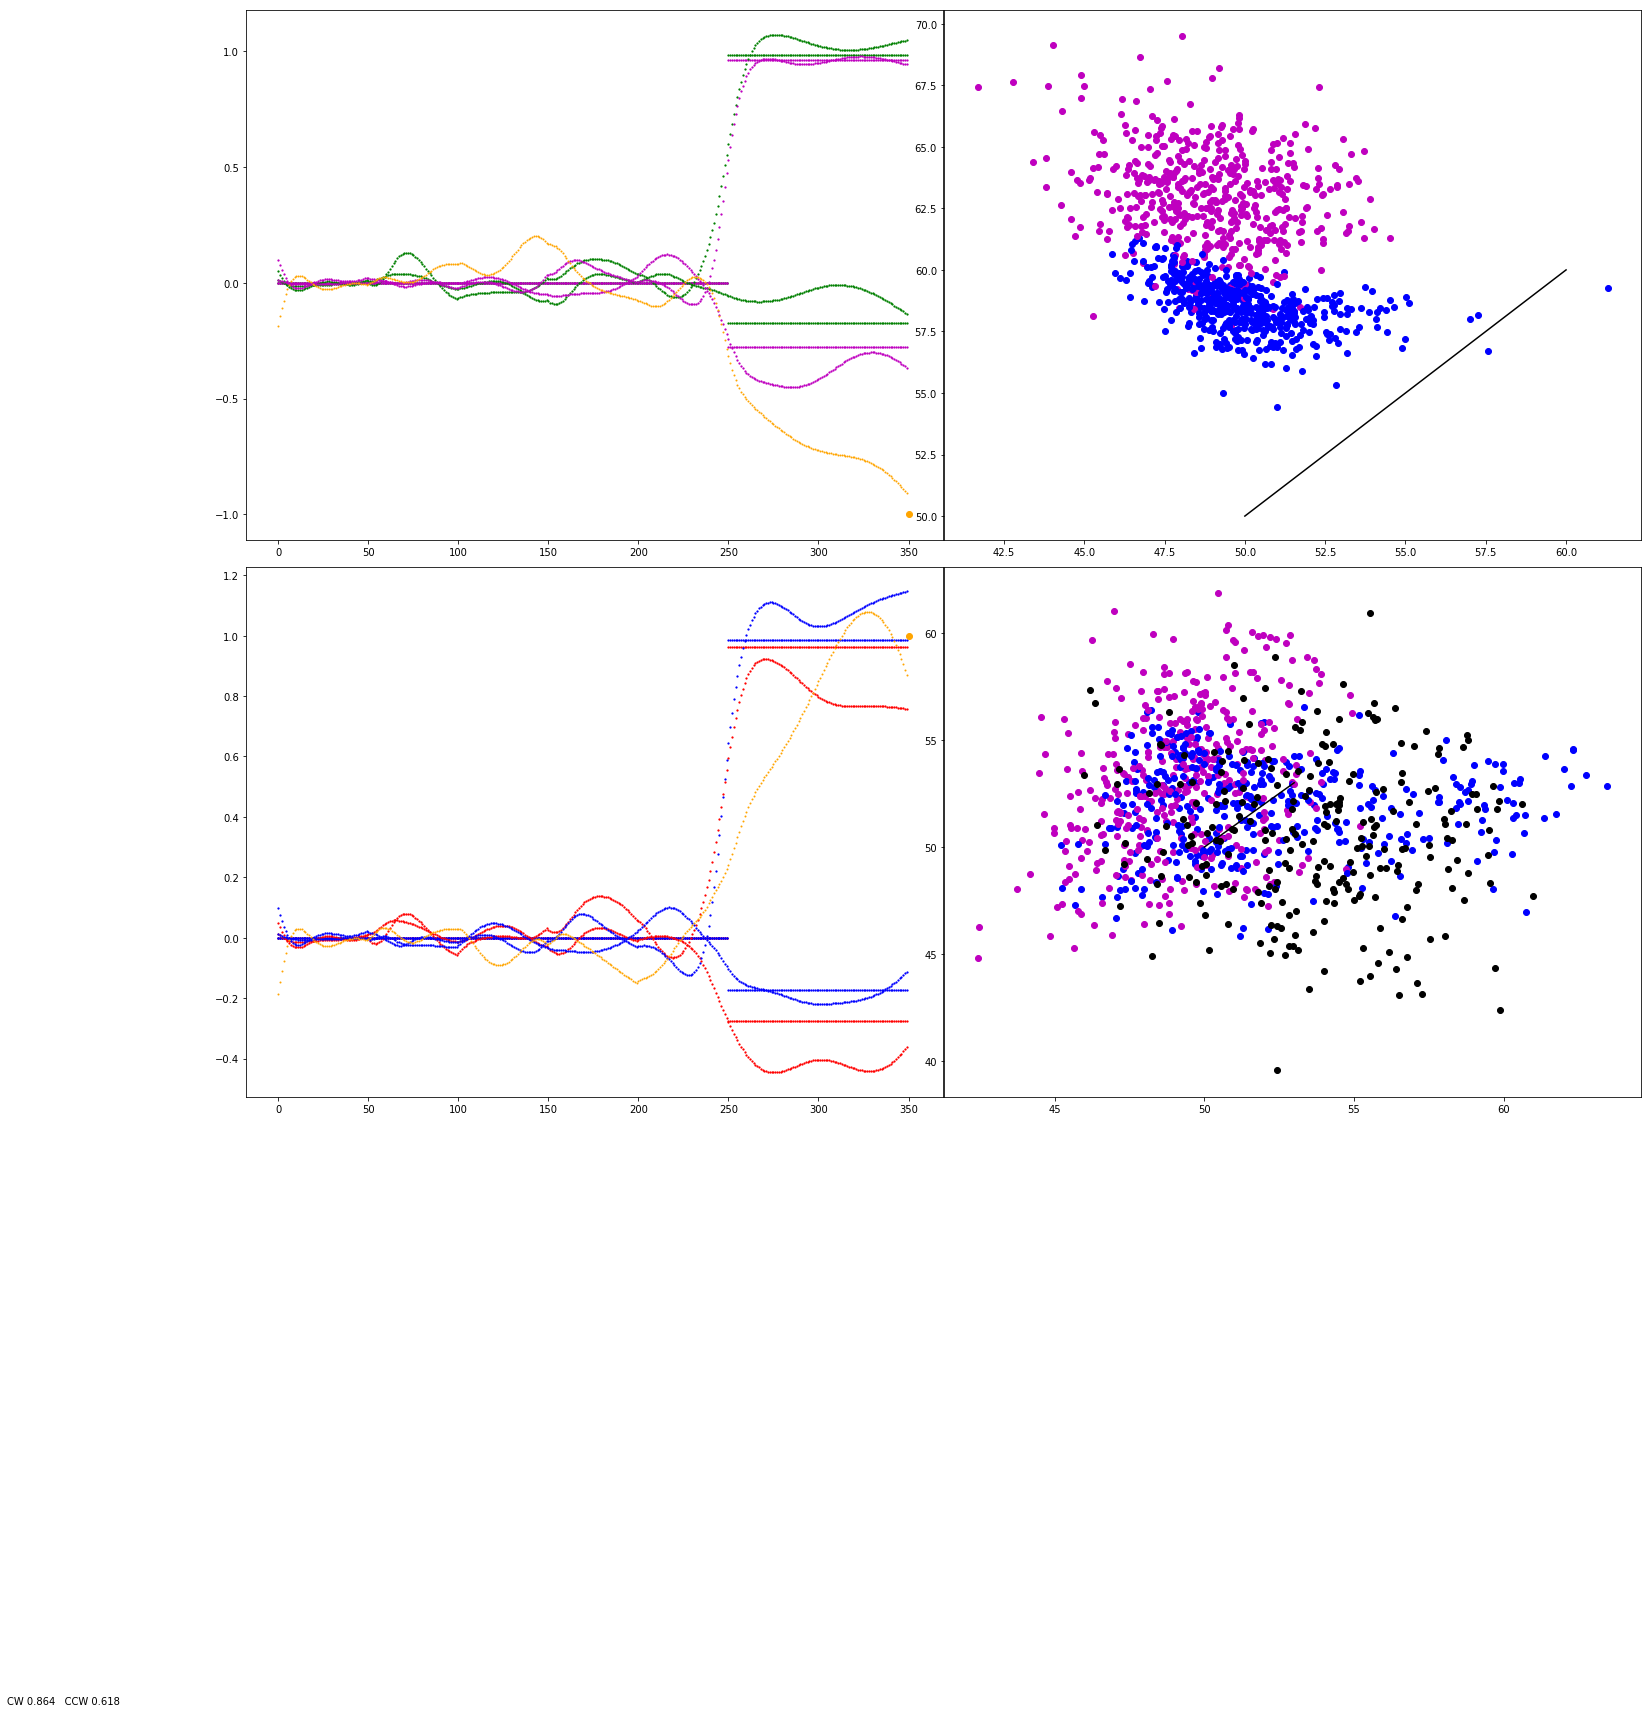

Step 750,before optimize, Minibatch Loss= 0.0046
Step 750, Minibatch Loss= 0.0043


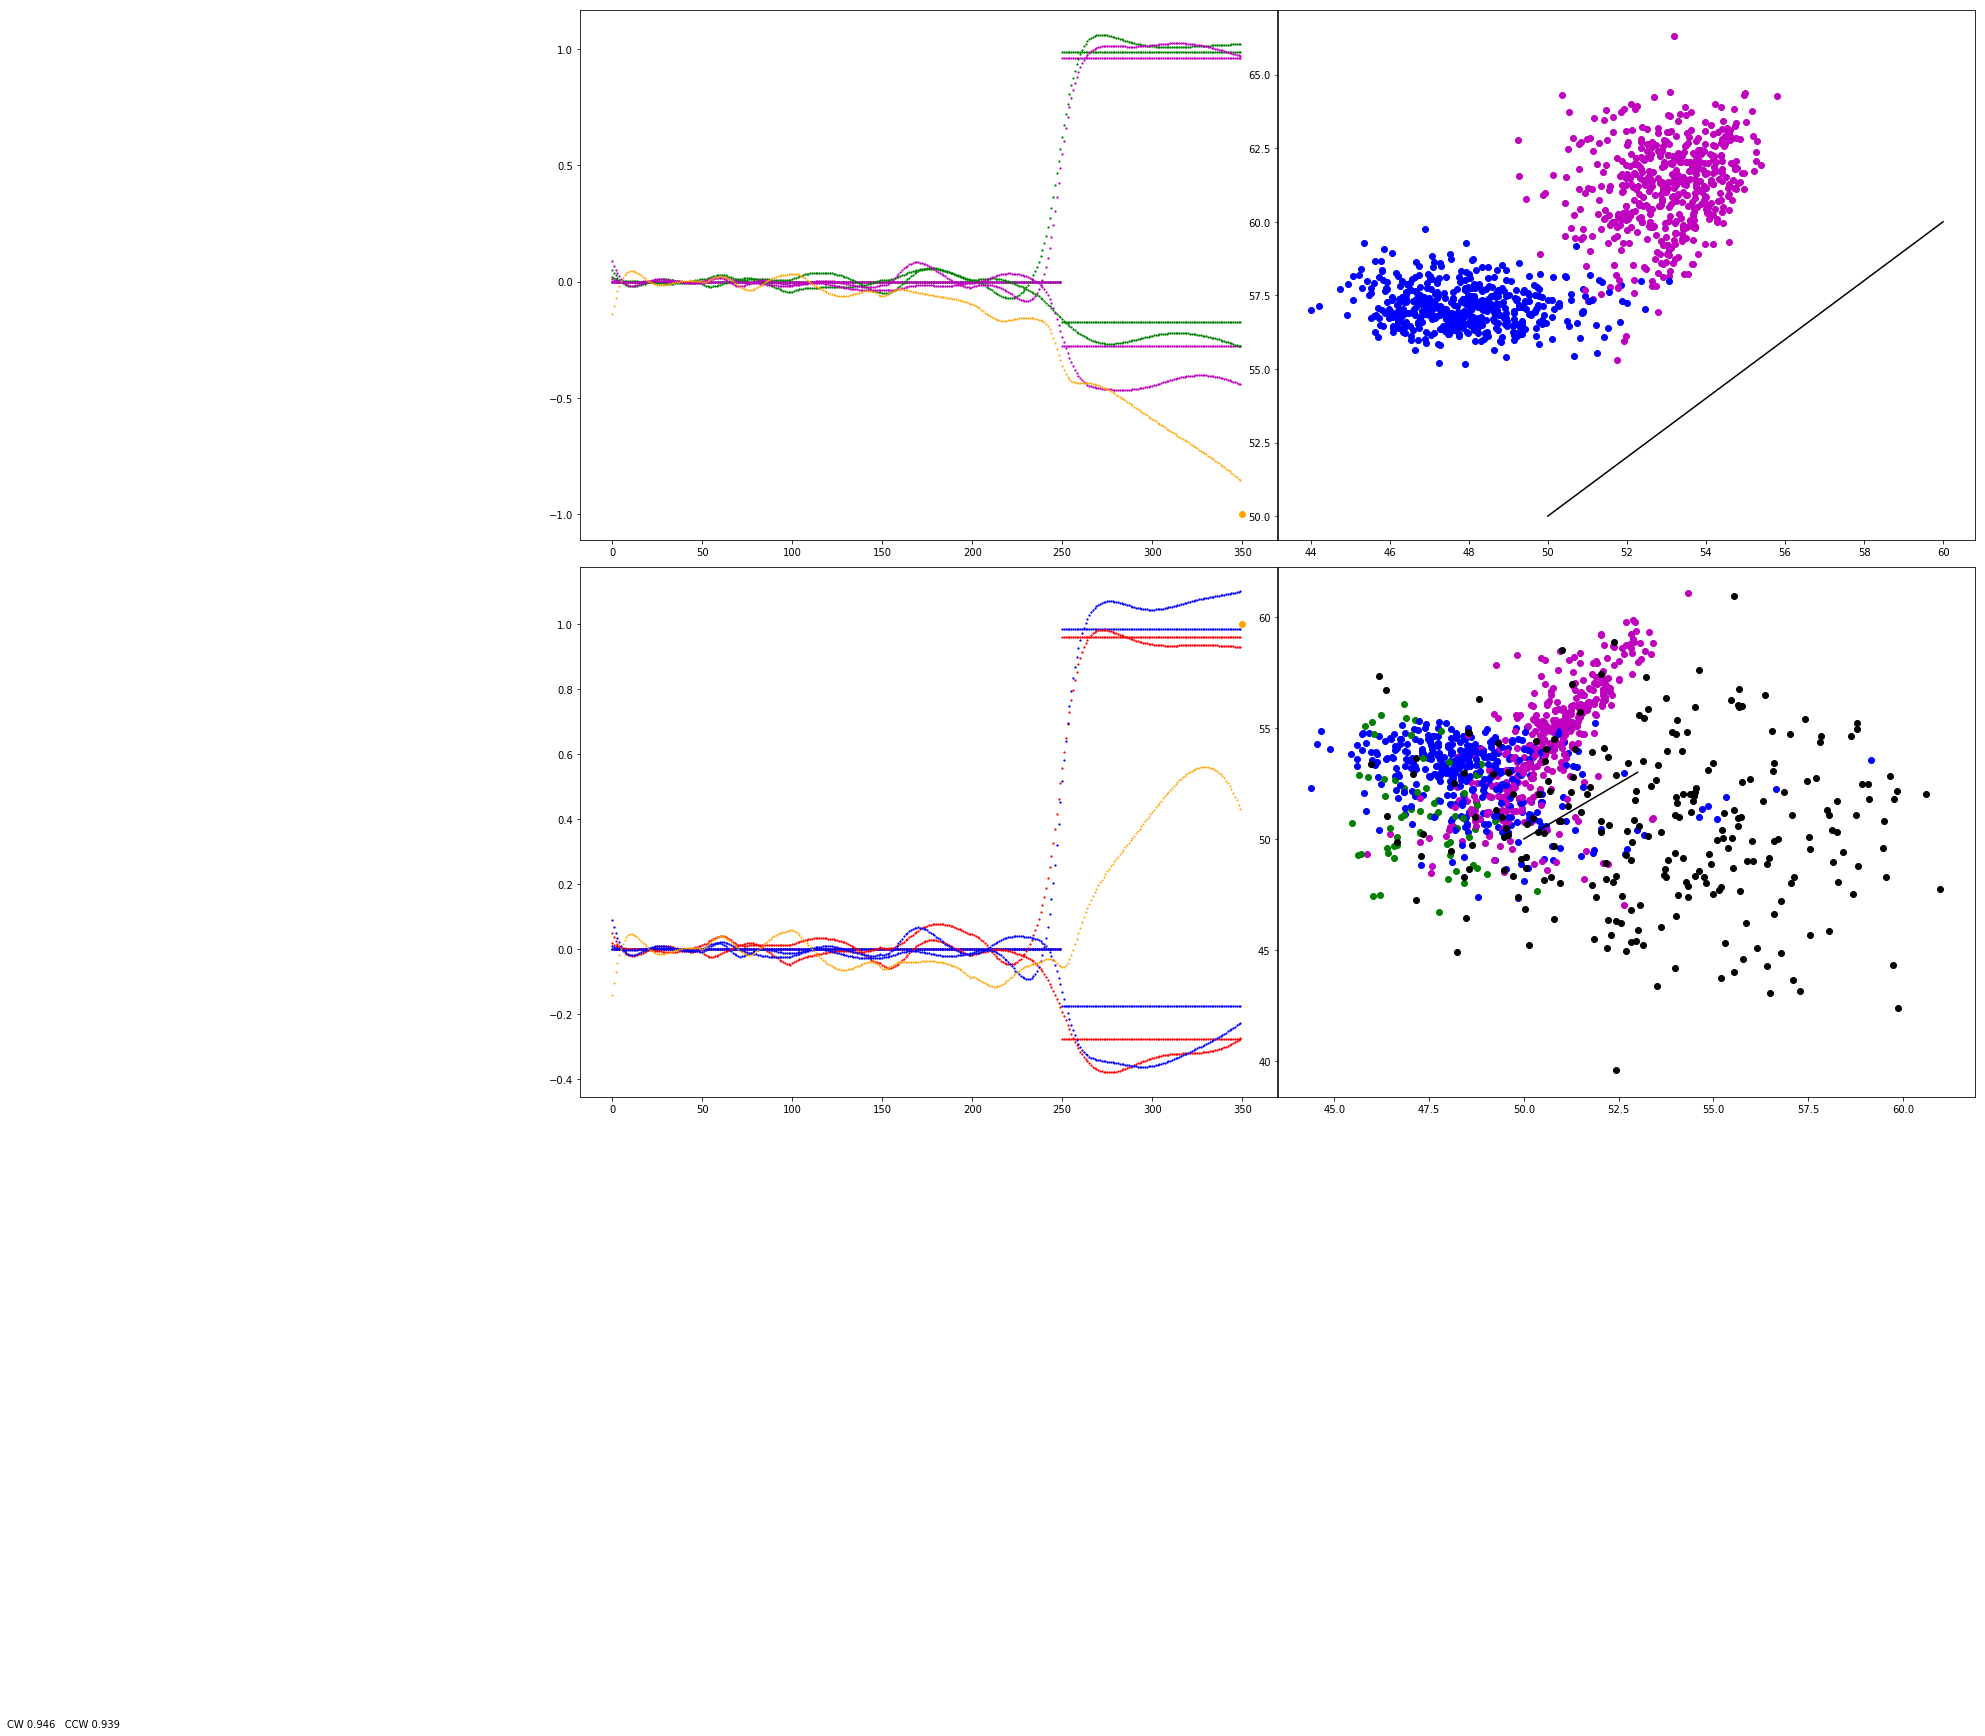

Step 800,before optimize, Minibatch Loss= 0.0042
Step 800, Minibatch Loss= 0.0039


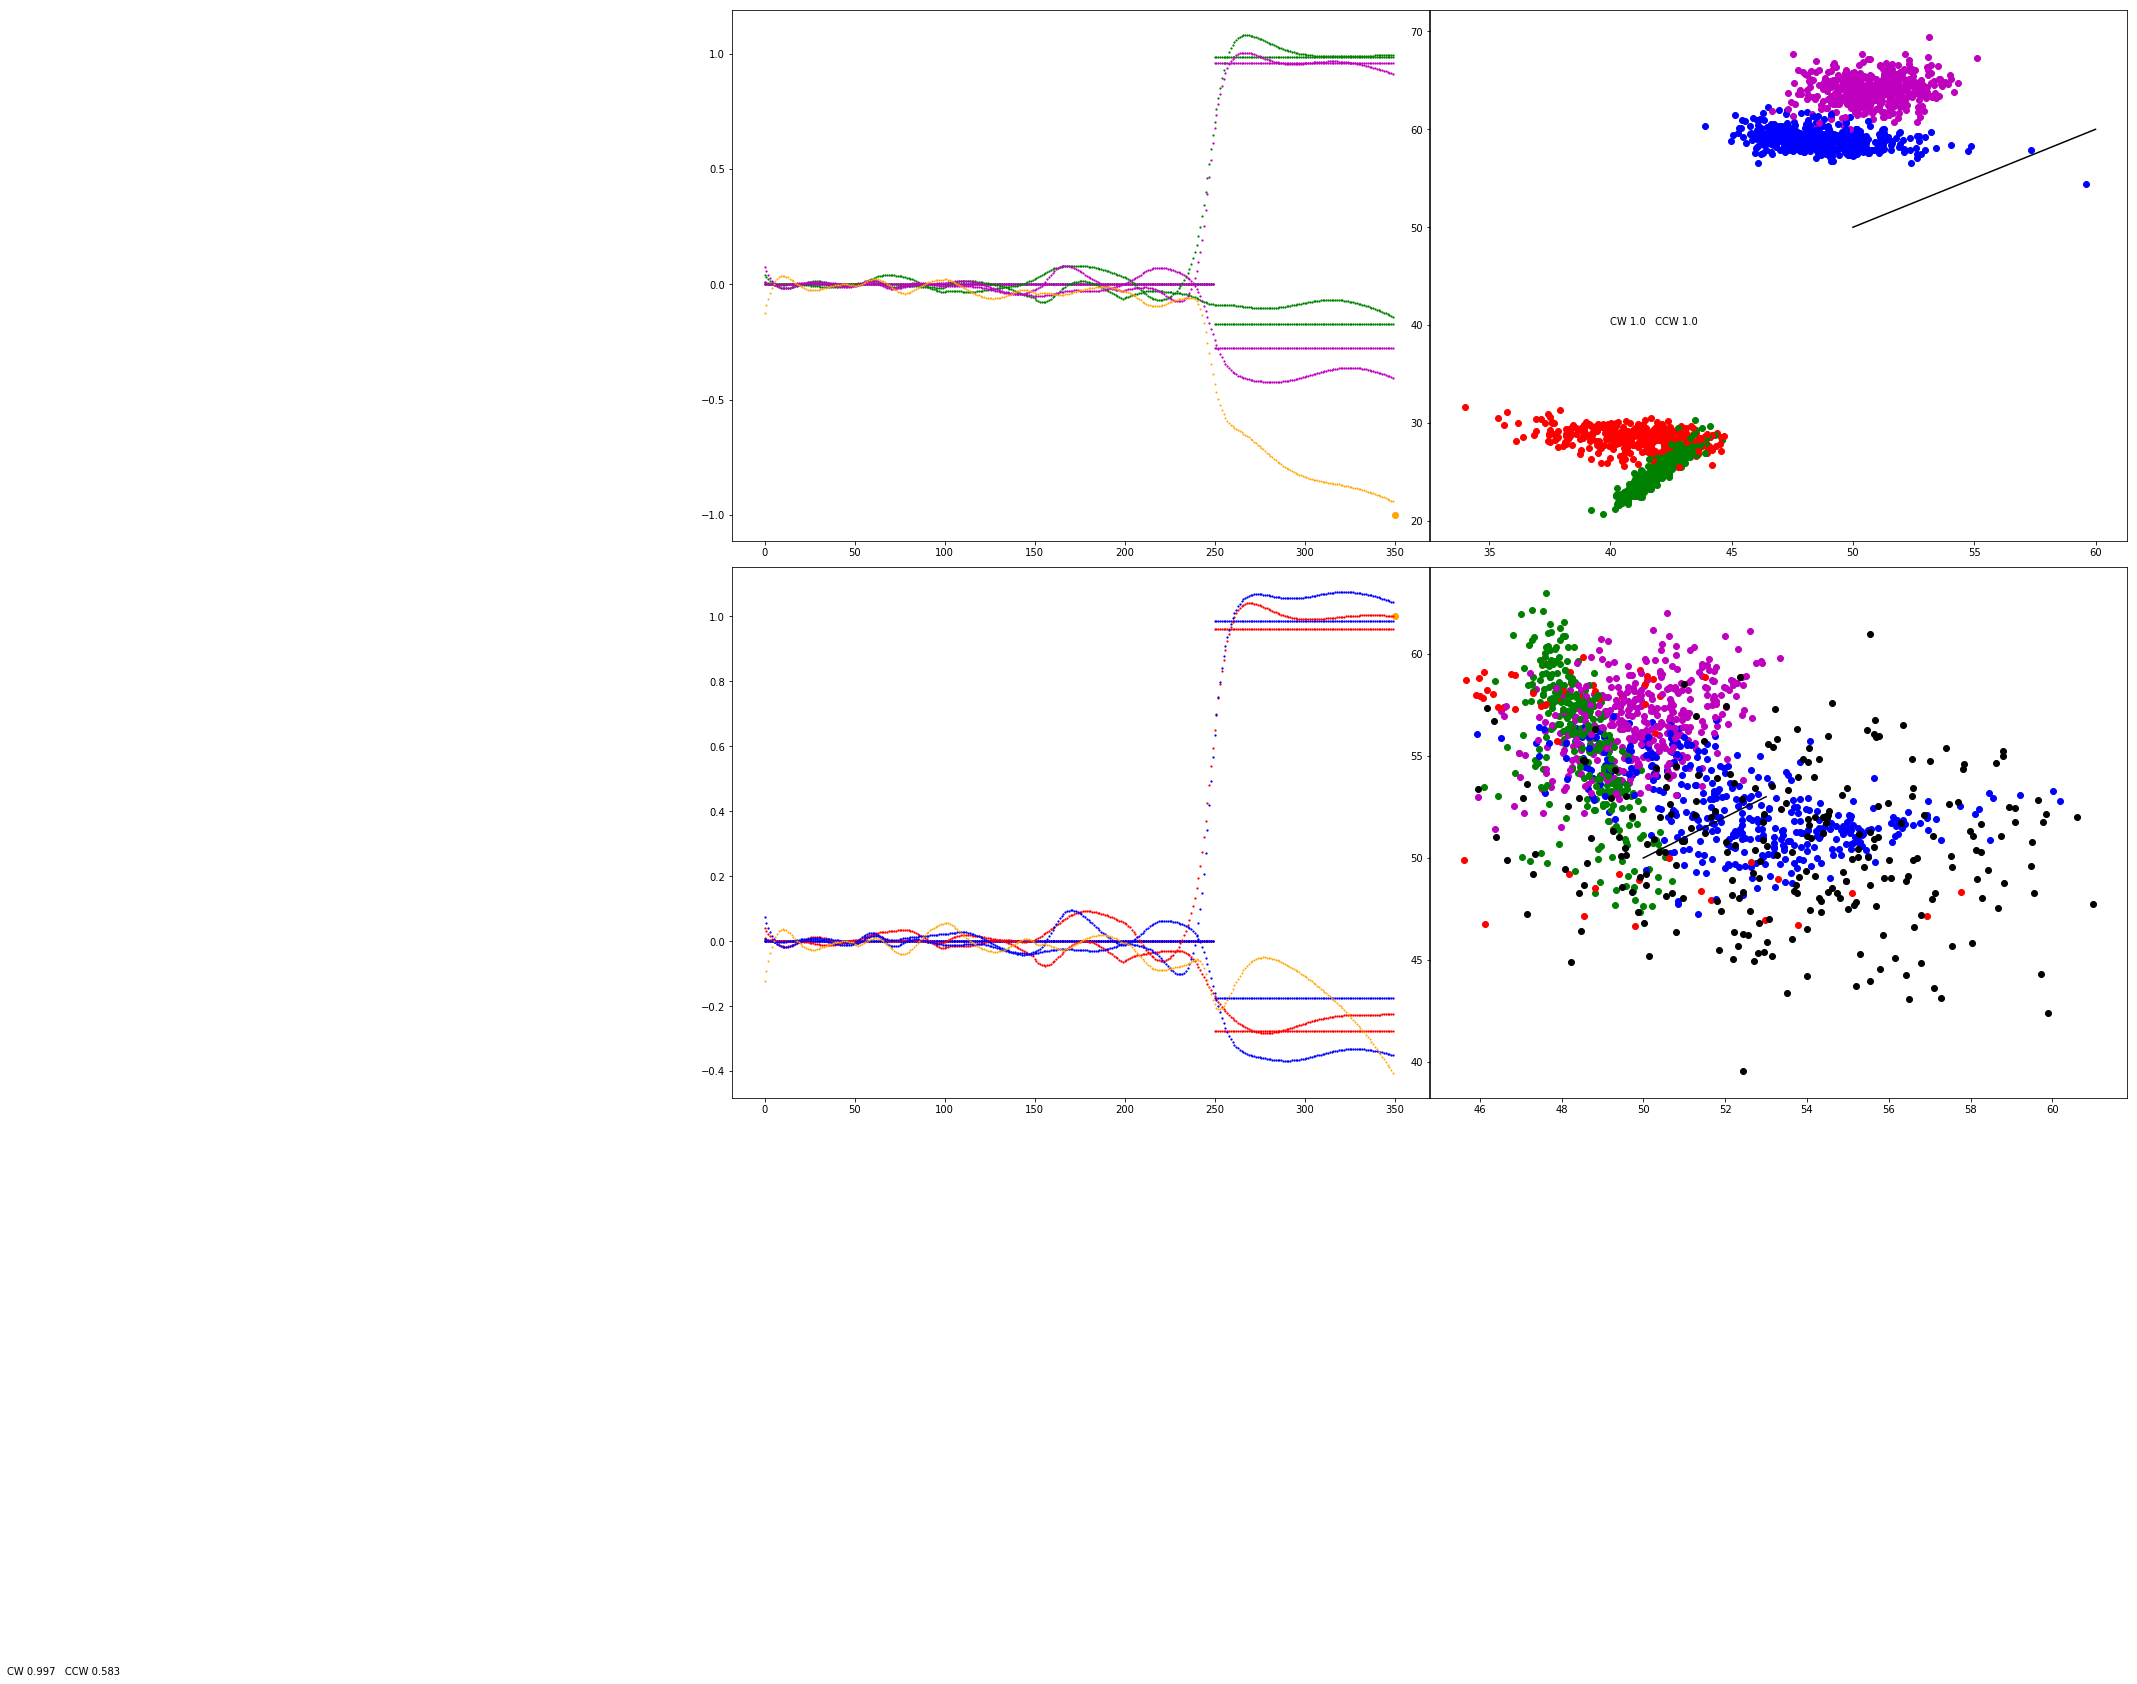

Step 850,before optimize, Minibatch Loss= 0.0039
Step 850, Minibatch Loss= 0.0035


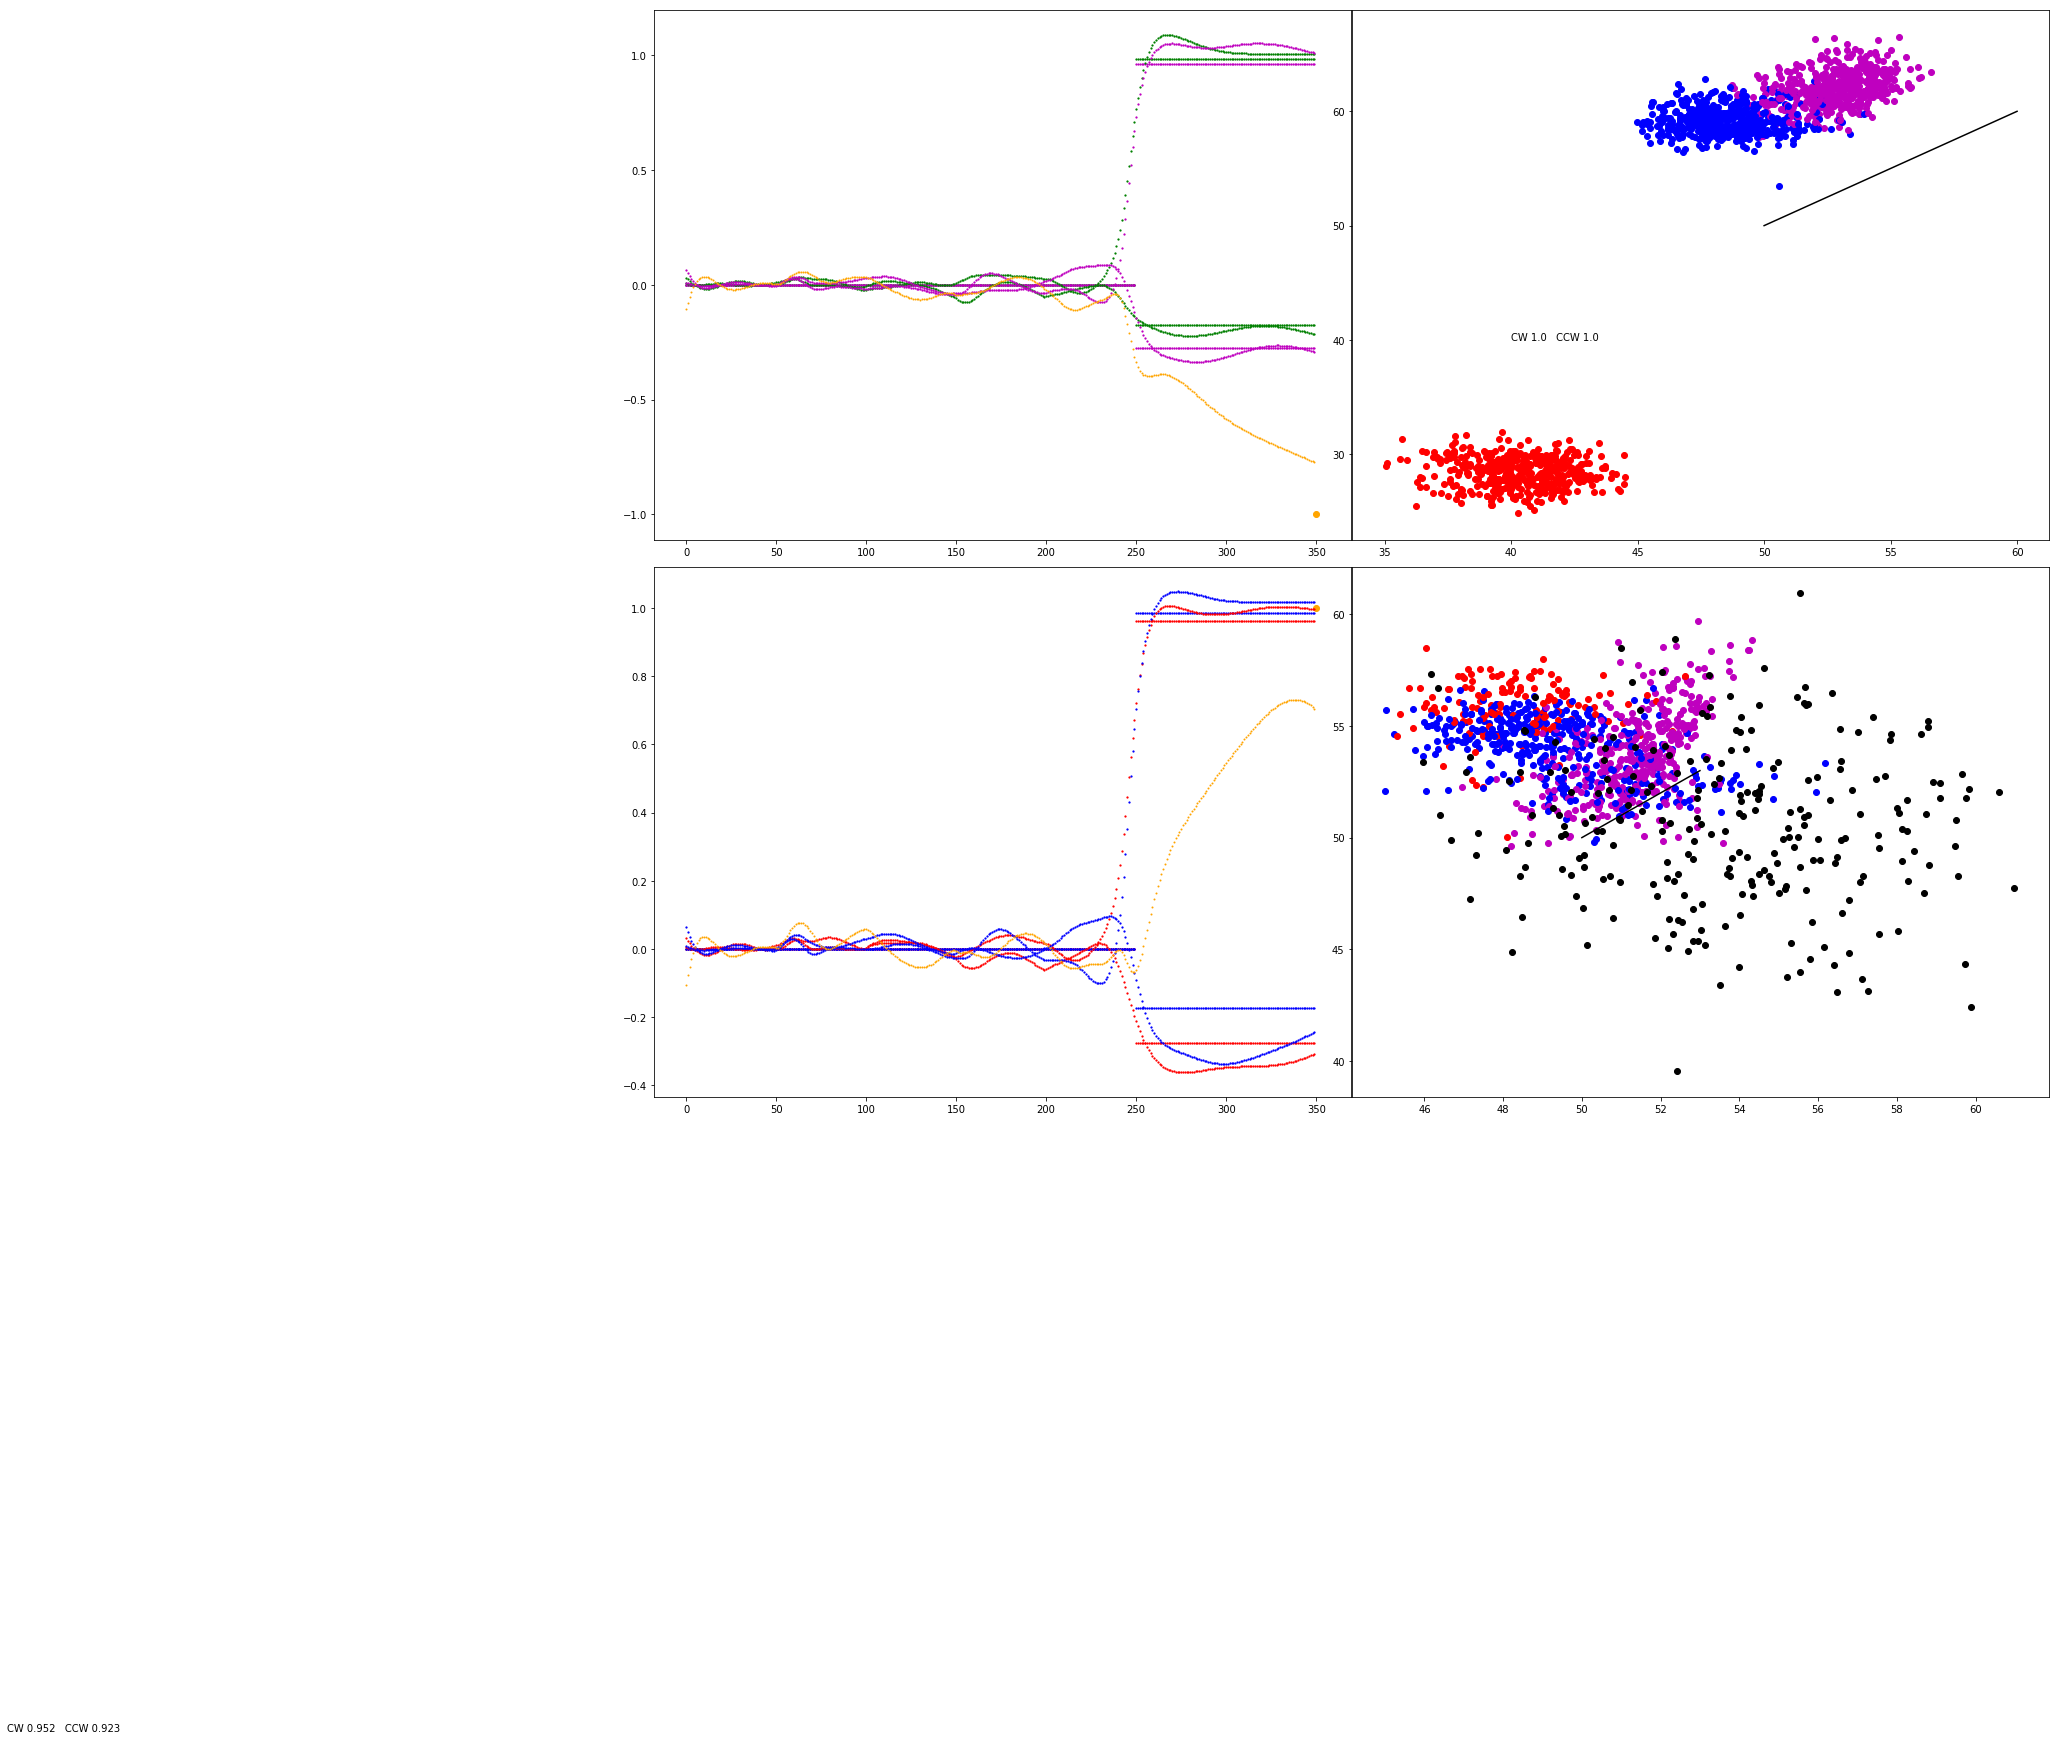

Step 900,before optimize, Minibatch Loss= 0.0038
Step 900, Minibatch Loss= 0.0034


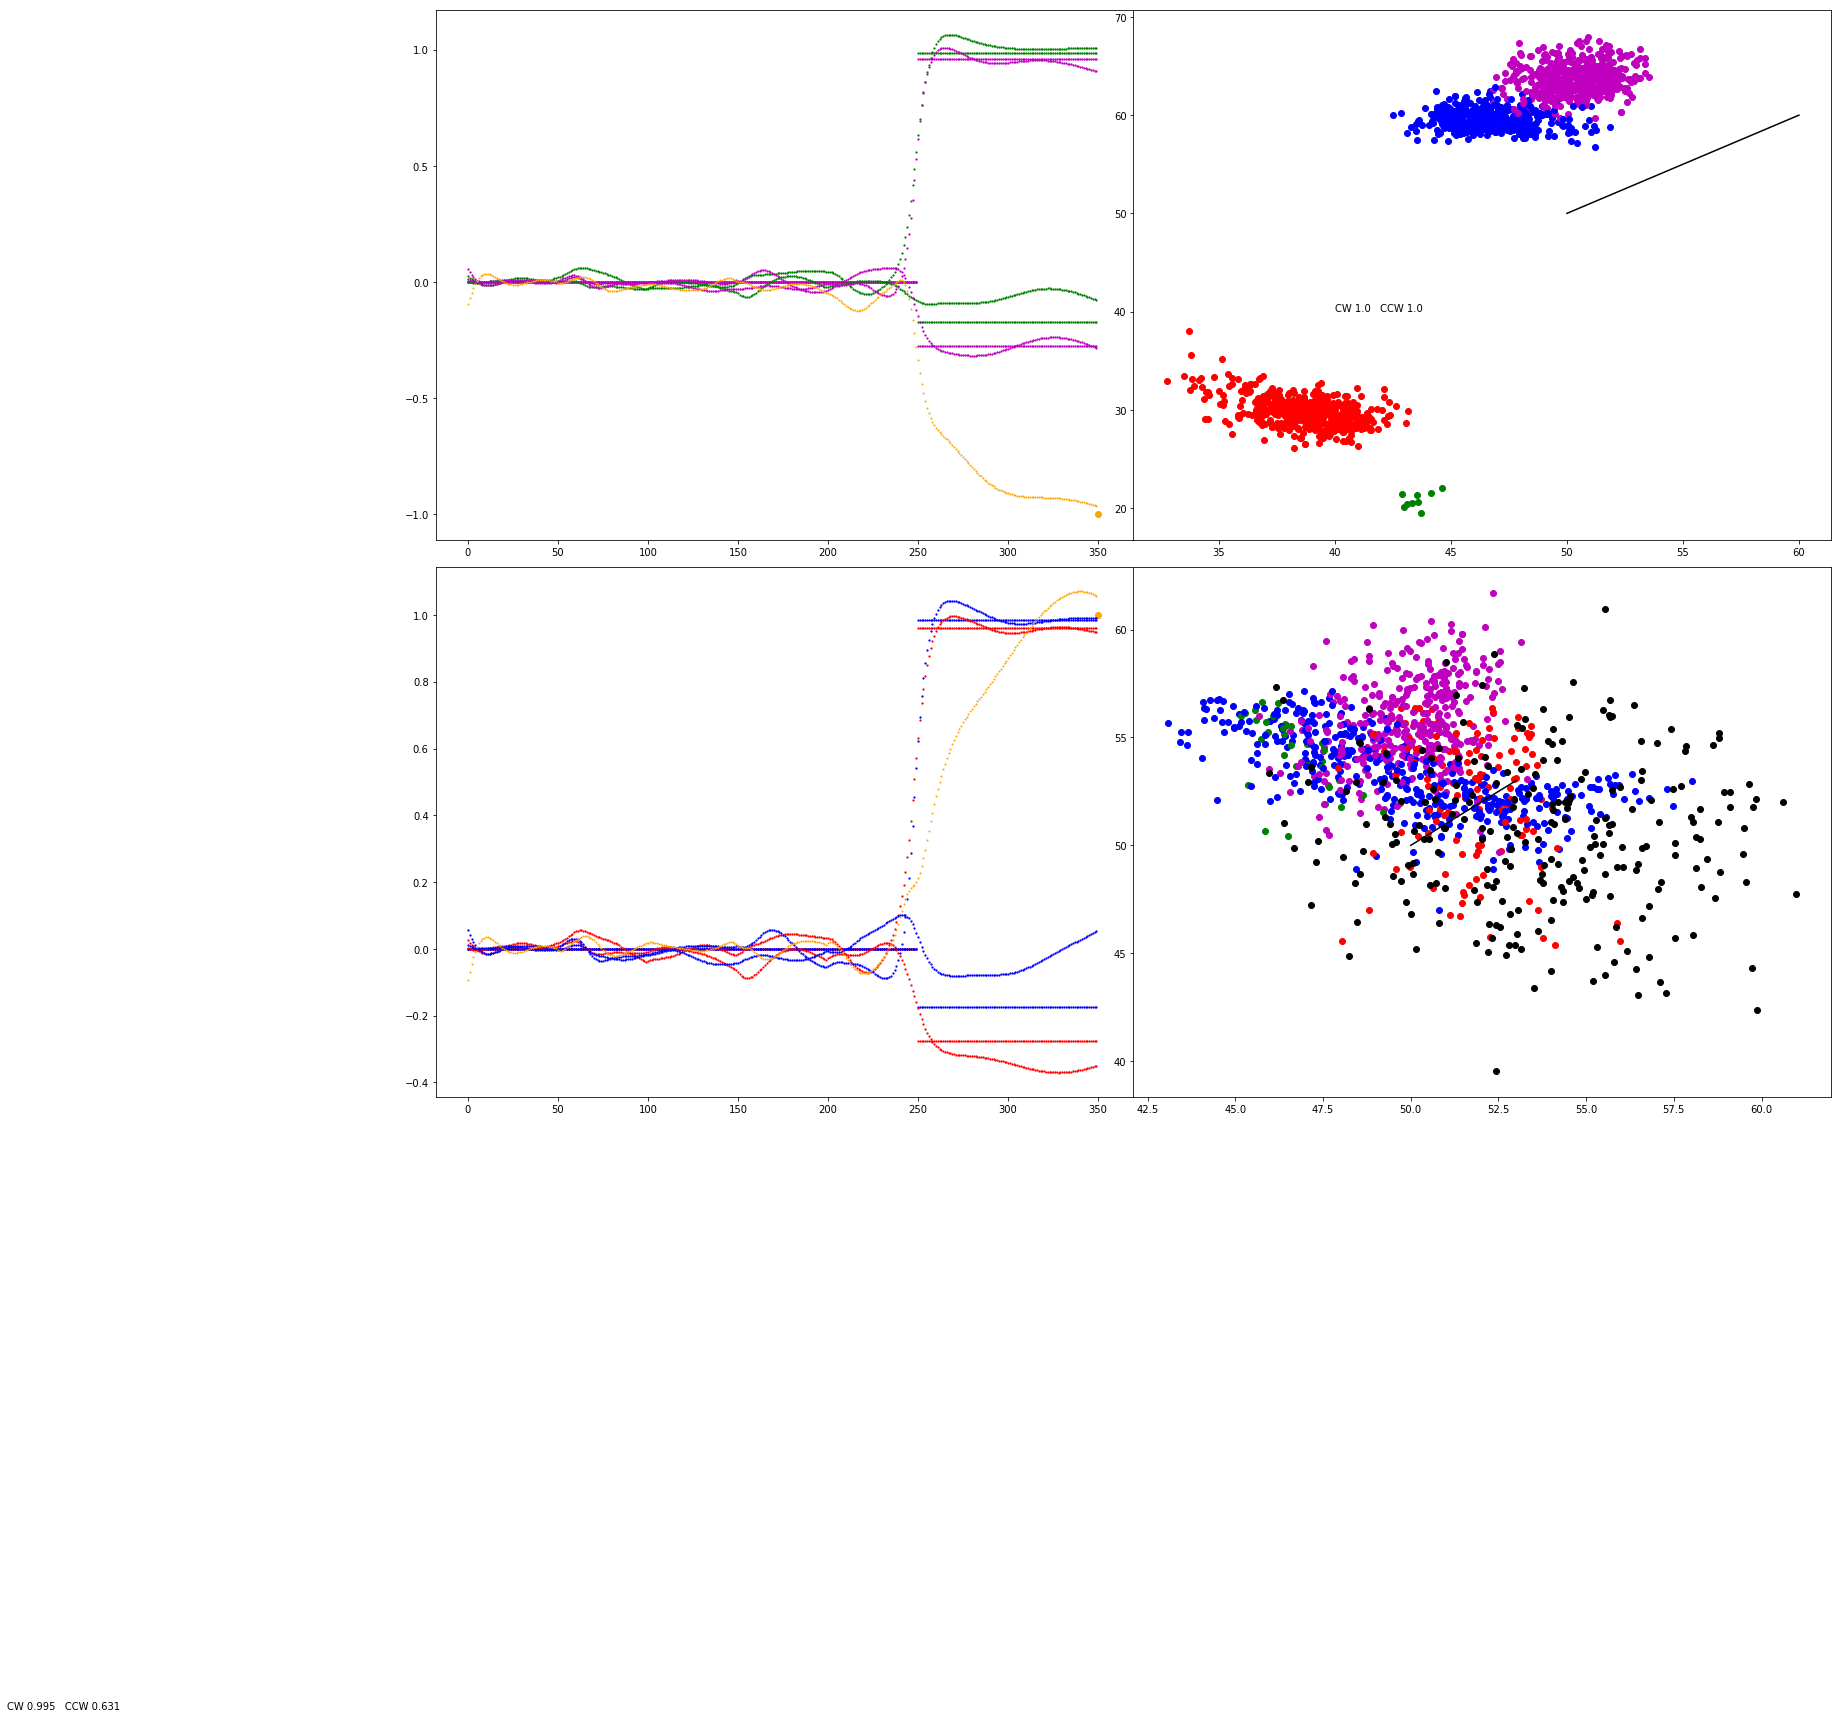

Step 950,before optimize, Minibatch Loss= 0.0034
Step 950, Minibatch Loss= 0.0031


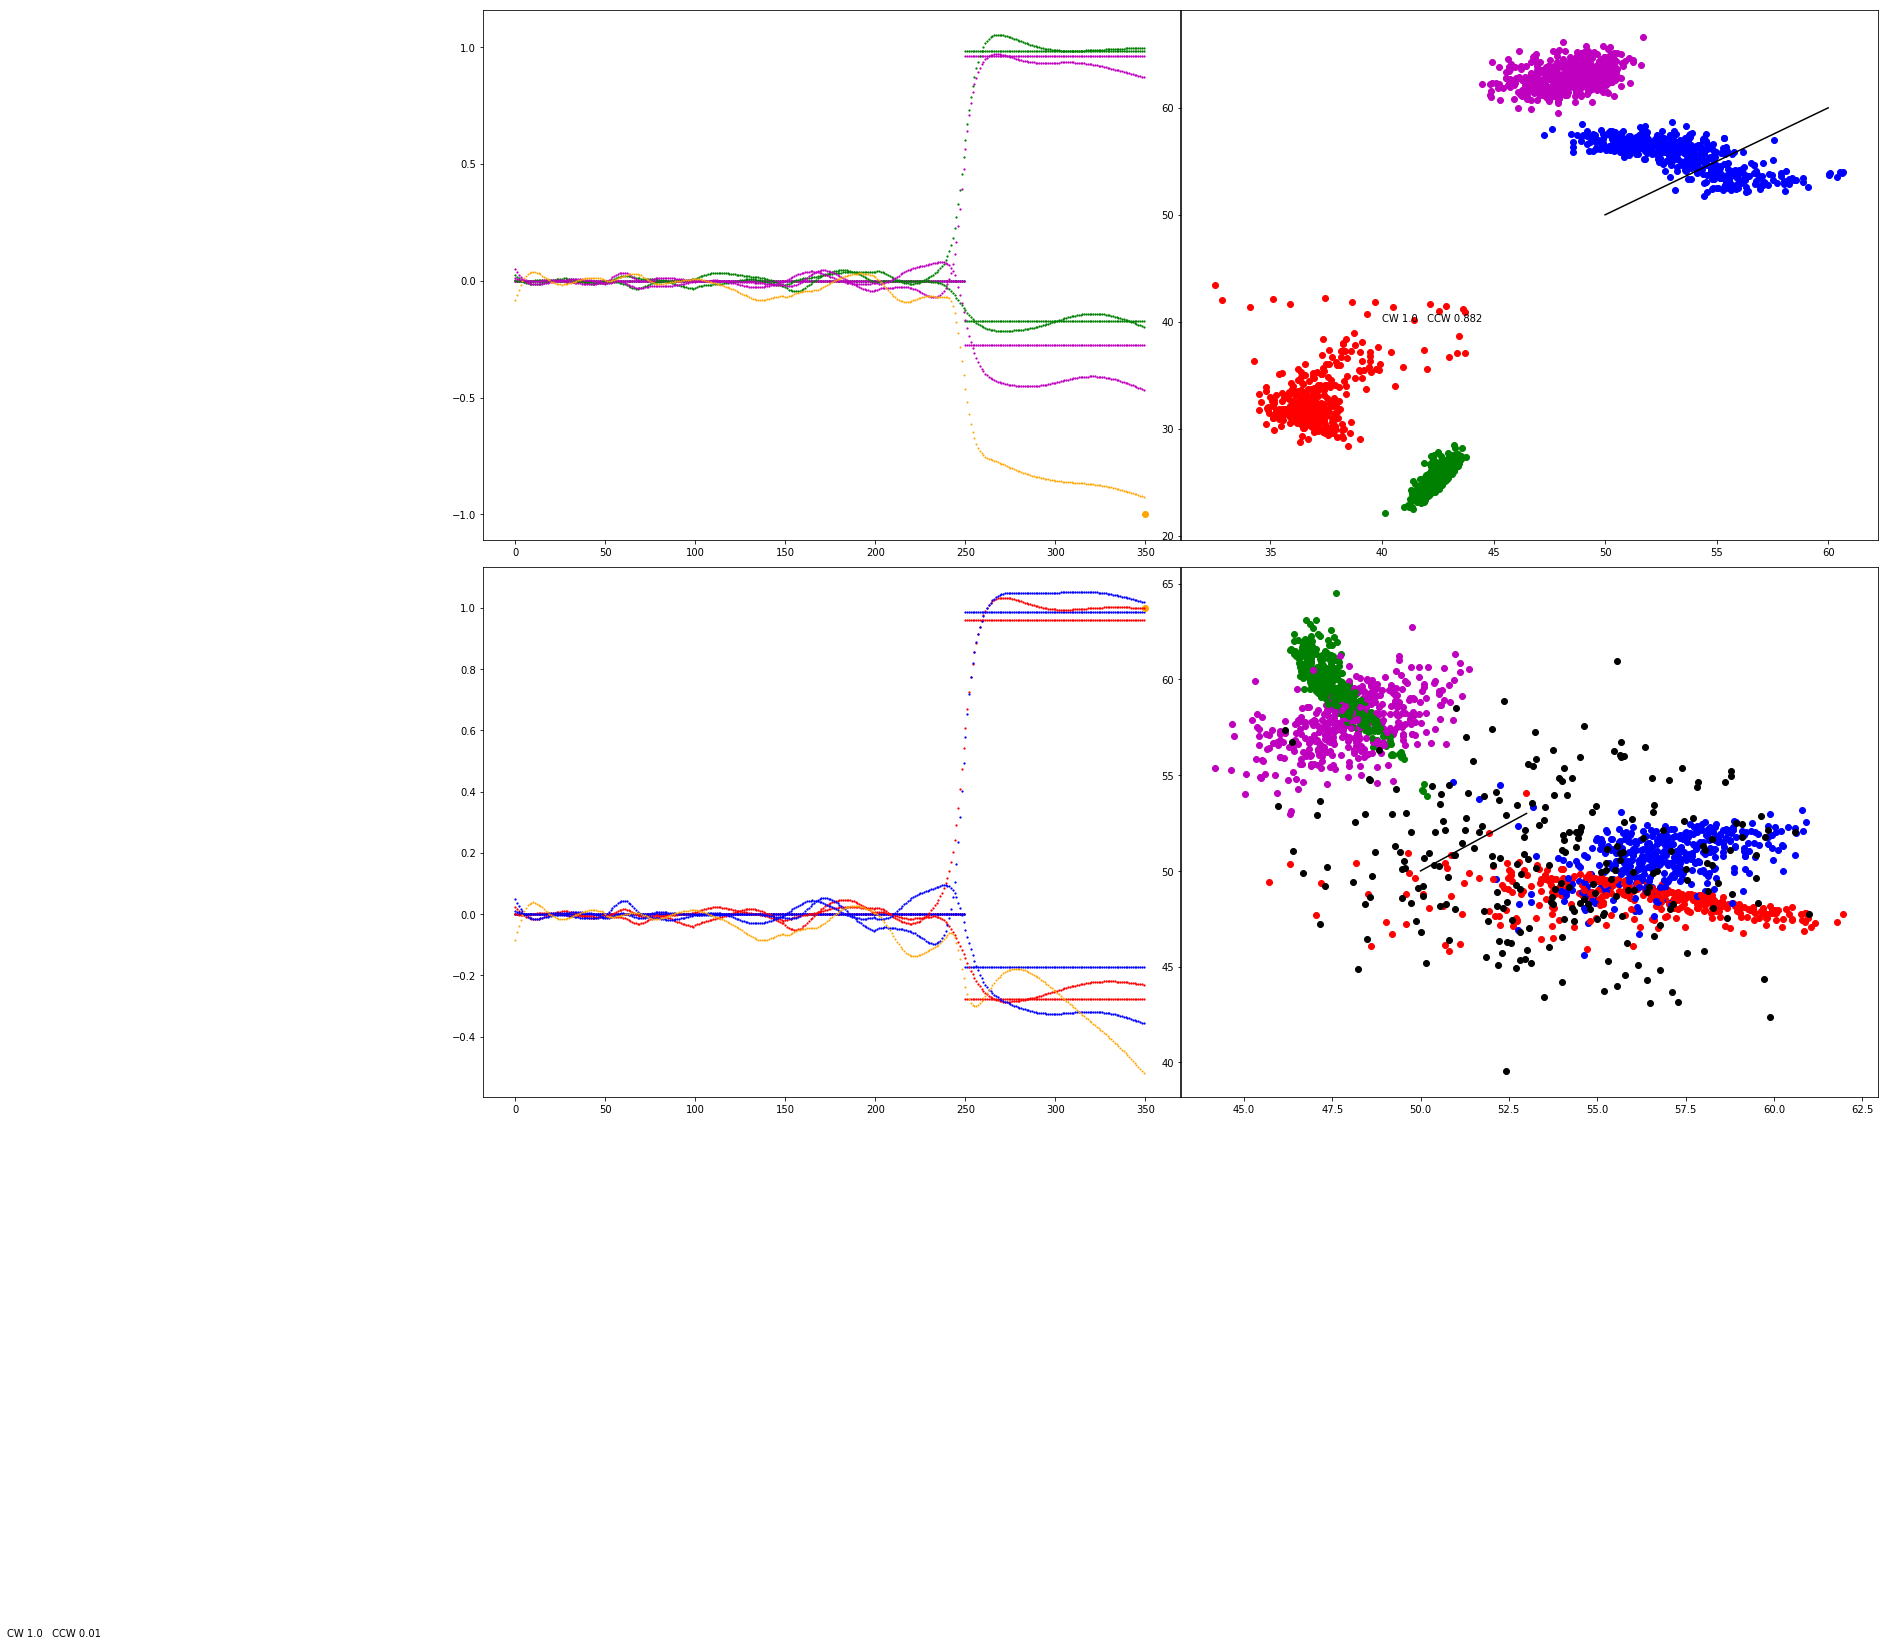

Step 1000,before optimize, Minibatch Loss= 0.0032
Step 1000, Minibatch Loss= 0.0030


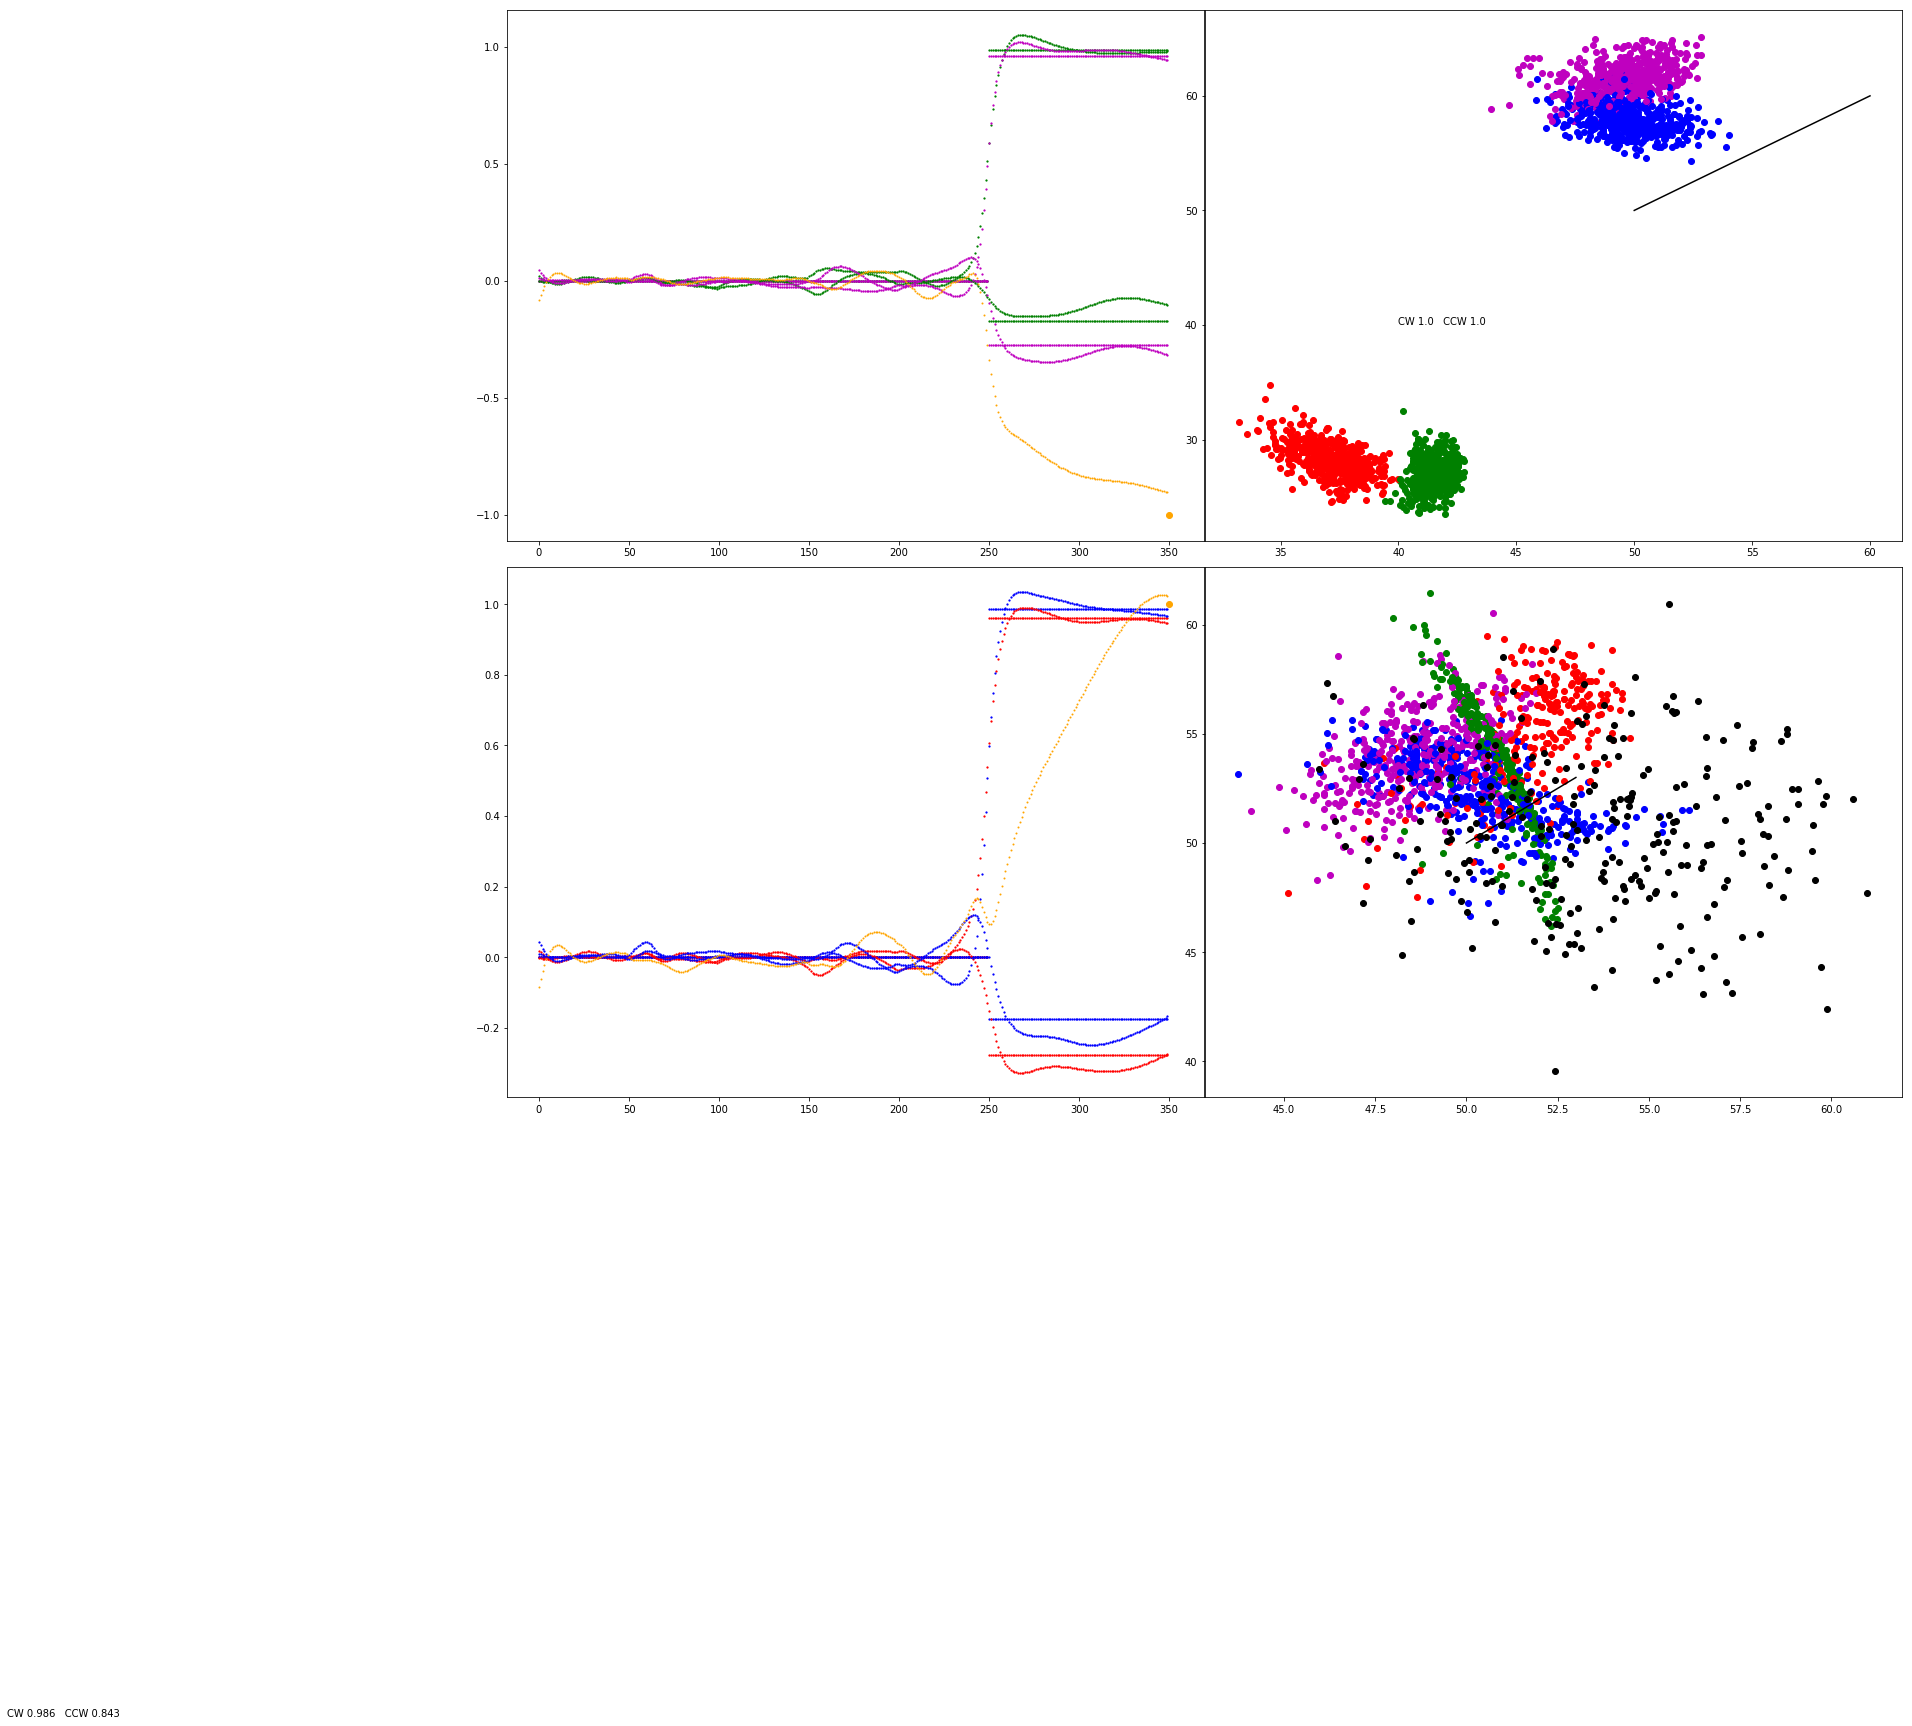

Step 1050,before optimize, Minibatch Loss= 0.0031
Step 1050, Minibatch Loss= 0.0028


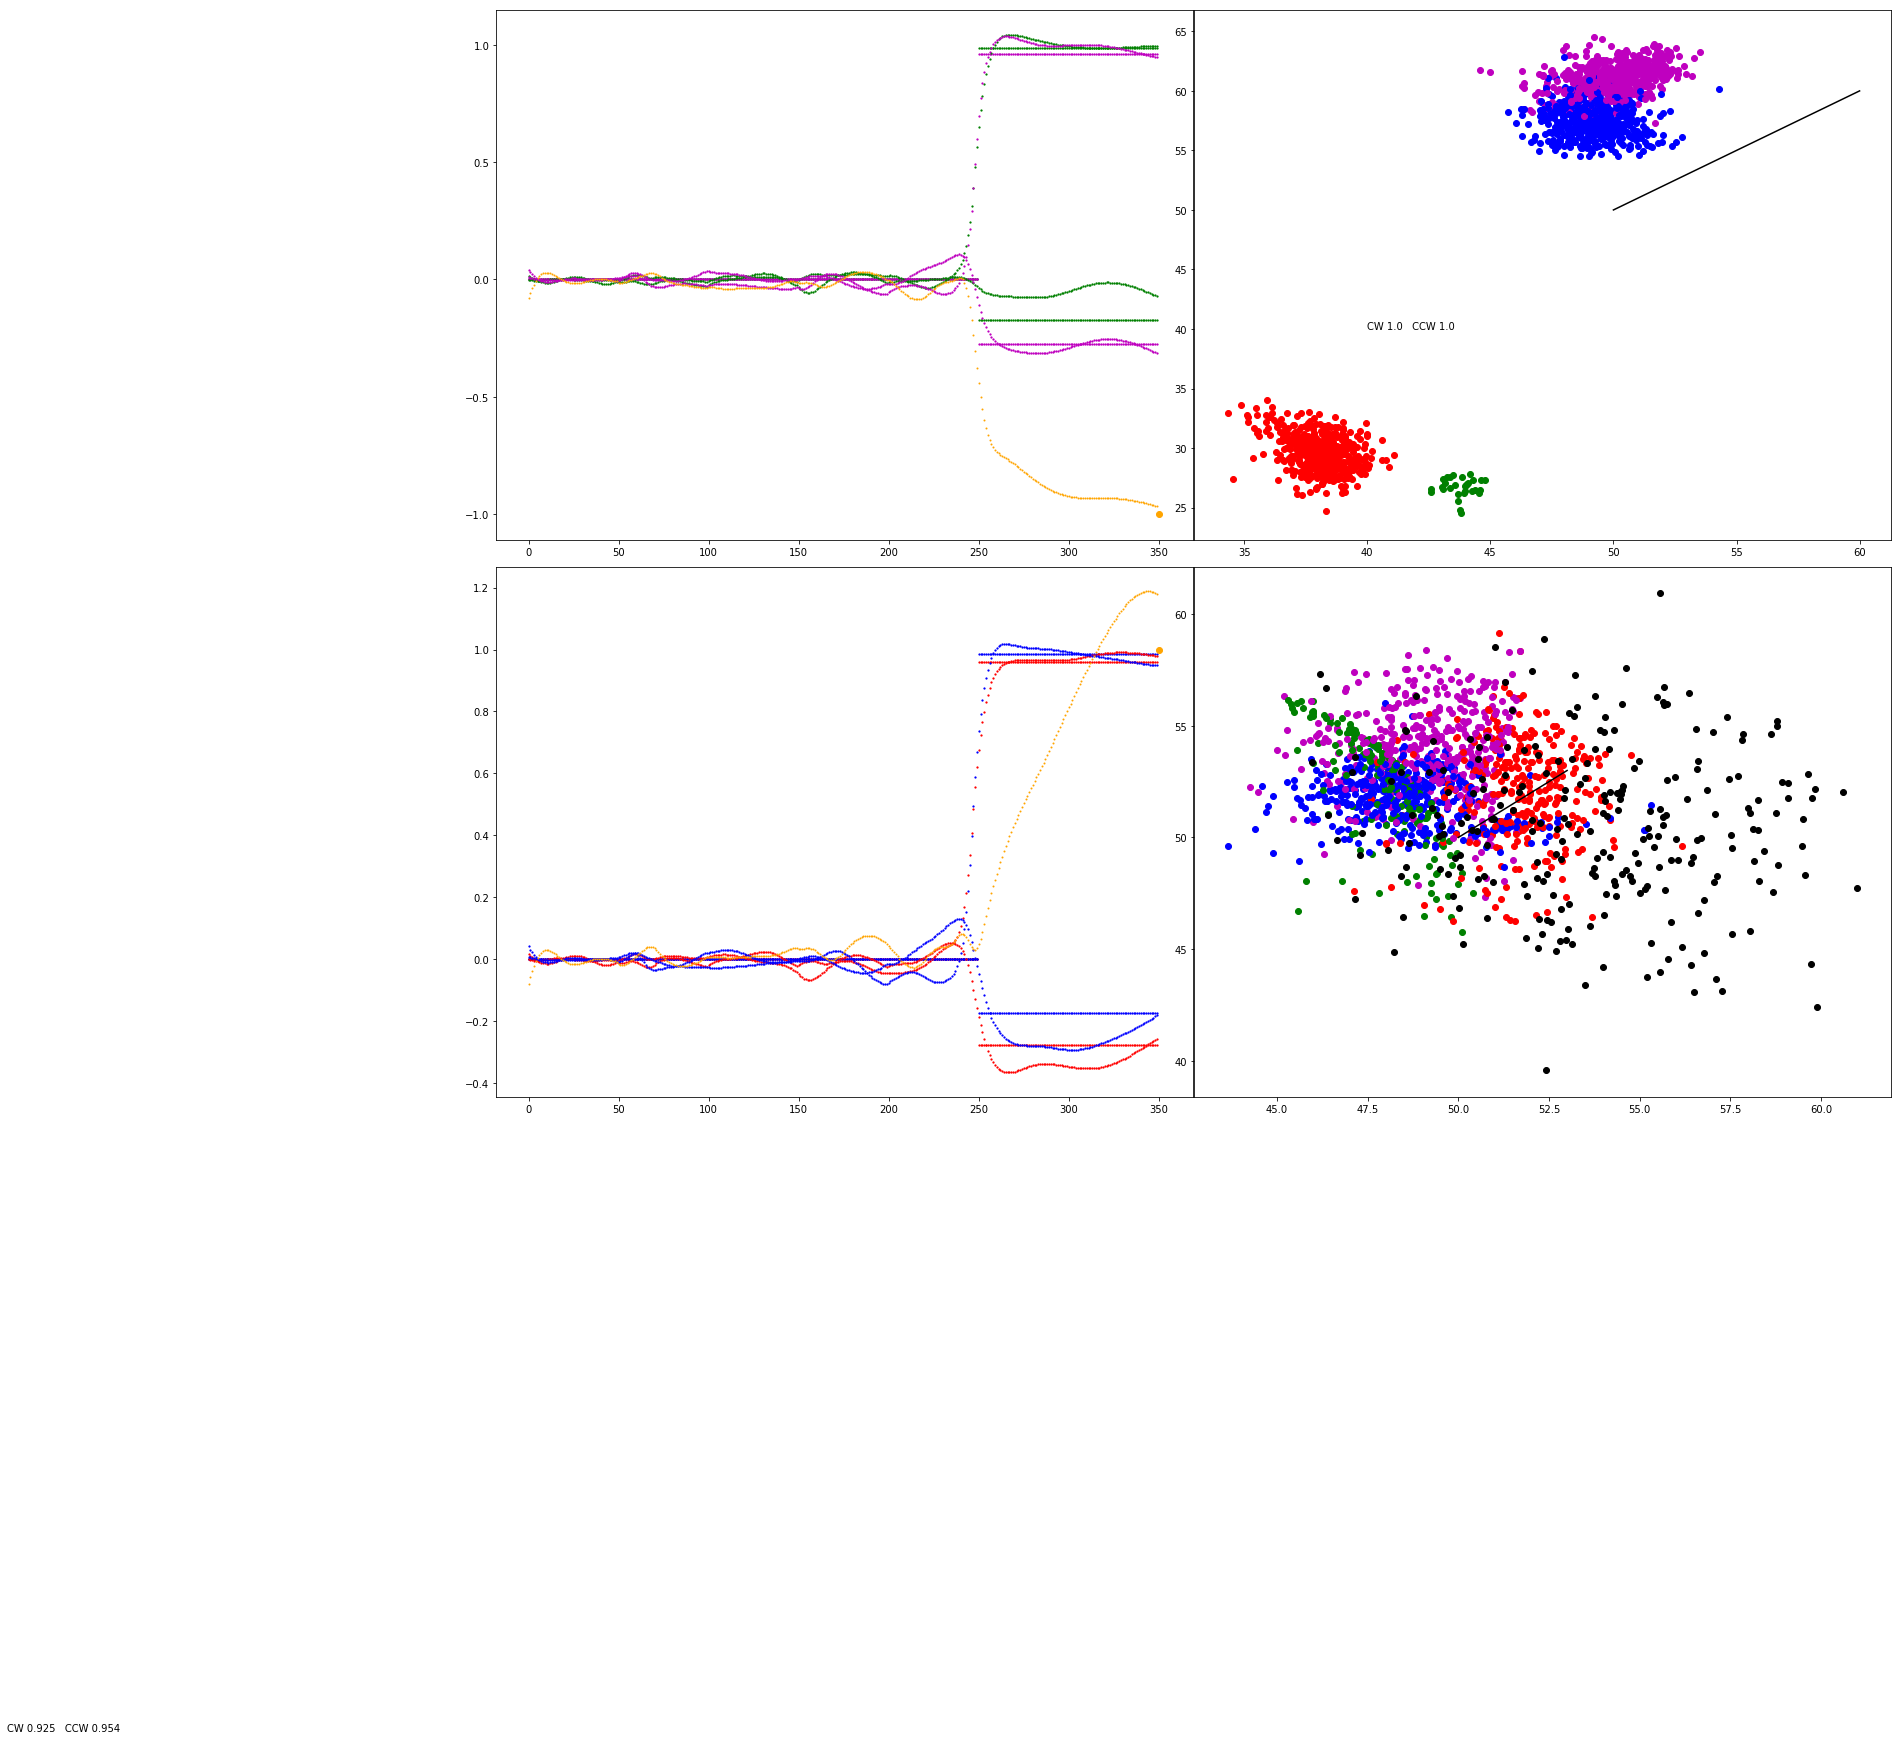

Step 1100,before optimize, Minibatch Loss= 0.0028
Step 1100, Minibatch Loss= 0.0026


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.contrib import rnn
import matplotlib.pyplot as plt
import sys
import pickle
sys.path.append("./")
import FR_RNN3 as FR
import matplotlib.cm as cm
%matplotlib inline
learning_rate = 0.001
training_steps = 5000
batch_size = 100
display_step = 50
epoch = 10
beta = .001
# Network Parameters
num_input =32 
timesteps = 350 # timesteps
num_hidden = 100 # hidden layer num of features
num_layers = 1
num_classes = 6
# tf Graph input
X = tf.placeholder("float", [None, timesteps, num_input],name = "X")
Y = tf.placeholder("float", [None, timesteps, num_classes], name = "Y")

# Define weights
weights = {
    'out': tf.Variable(tf.random_normal([num_hidden, num_classes]))
}
biases = {
    'out': tf.Variable(tf.random_normal([num_classes]))
}

#define RNNcell using firing rate model
def RNN(X, weights, biases):
    
    cells = []
    for _ in range(num_layers):
      cell = FR.FiringRateRNNCell(num_hidden) 
      cells.append(cell)
    cell = rnn.MultiRNNCell(cells)
    
    outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    return outputs

hidden_before_act = RNN(X, weights, biases)
hidden_after_act = tf.tanh(hidden_before_act,name = 'hidden_after_act')
hidden_before_act = tf.reshape(hidden_before_act,[-1,num_hidden])
logits = tf.matmul(tf.tanh(hidden_before_act),weights['out']) + biases['out']
logits = tf.reshape(logits,[-1, timesteps, num_classes],name = 'logits')


# Define loss and optimizer
loss_op = tf.reduce_mean(tf.square(logits - Y),name = 'loss_op')+tf.reduce_mean(tf.nn.l2_loss(weights['out']))*beta
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate,name = 'Adam')
#clip gradient
gvs = optimizer.compute_gradients(loss_op)
capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
train_op = optimizer.apply_gradients(capped_gvs)

init = tf.global_variables_initializer()
#store RNN performance during training:
loss_history = []
test_history = []
CCW_acc = [] 
CW_acc = []

saver = tf.train.Saver()

# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, training_steps+1):
        batch_x, batch_y = FR.VPDATAtrainingN1(BatchSize=batch_size,ratio = .25*(1-np.float64(step)/training_steps)+.03)
        # Run optimization op (backprop)
        if step % display_step == 0 or step == 1:
            loss = sess.run(loss_op , feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ",before optimize, Minibatch Loss= " + \
                  "{:.4f}".format(loss) )
            test_history.append(loss)
        #training
        for i in range(epoch): 
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss,logits_ ,hidden= sess.run([loss_op,logits,hidden_after_act], feed_dict={X: batch_x, Y: batch_y})
            loss_history.append(loss)
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) ) 
            saver.save(sess, './hiddenNoise001/TwoAngleORL2beta00001-new/hiddenNoise001',global_step=step)   
            fig1, axs1 = plt.subplots(2,2,figsize=(25, 20))
            fig1.subplots_adjust(hspace = .05, wspace=.001)
            axs1 = axs1.ravel()
            
            #plot RNN's prediction of stimulus pair 50/60 or 60/50(deg) 
            batchX,batchY = FR.VPDATAtestN1(a1 = 50,a2 = 60)
            feed_dict ={X:batchX,Y:batchY}
            logitsOR_1 = sess.run(logits,feed_dict)
            batchX,batchY = FR.VPDATAtestN2(a1 = 60,a2 = 50)
            feed_dict ={X:batchX,Y:batchY}
            logitsOR_2  = sess.run(logits,feed_dict)

            a = 0 #count right guess of ordinal relationship at counter-clockwise stimuli situation
            b = 0 #at clockwise stimuli situation
            i = 1 # subplot in figure 1

            for j in range(500):
                axs1[i].scatter(np.arcsin(logitsOR_2[j,349:350,2])*90./np.pi,(np.arcsin(logitsOR_2[j,349:350,0])*90./np.pi),c = 'r')
                axs1[i].scatter(np.arcsin(logitsOR_1[j,349:350,0])*90./np.pi,(np.arcsin(logitsOR_1[j,349:350,2])*90./np.pi),c = 'g')
                axs1[i].scatter(np.arccos(logitsOR_2[j,349:350,3])*90./np.pi,(np.arccos(logitsOR_2[j,349:350,1])*90./np.pi),c ='b')
                axs1[i].scatter(np.arccos(logitsOR_1[j,349:350,1])*90./np.pi,(np.arccos(logitsOR_1[j,349:350,3])*90./np.pi),c ='m')
                if logitsOR_1[j,349:350,4]<logitsOR_1[j,349:350,5]:
                    a = a+1
                if logitsOR_2[j,349:350,5]<logitsOR_2[j,349:350,4]:
                    b = b+1
            axs1[i].text(40,40,"CW "+str(a/500.)+"   CCW "+str(b/500.))
            axs1[i].plot([50,60],[50,60],c = 'k')
            
            
            #plot RNN's prediction of 50/53(deg) and 53/50(deg)
            batchX,batchY1 = FR.VPDATAtestN1(a1 = 50,a2 = 53)
            feed_dict ={X:batchX,Y:batchY1}
            logitsOR_1 = sess.run(logits,feed_dict)
            batchX,batchY2 = FR.VPDATAtestN2(a1 = 53,a2 = 50)
            feed_dict ={X:batchX,Y:batchY2}
            logitsOR_2  = sess.run(logits,feed_dict)
            i = 3
            a = 0
            b = 0
            axs1[i].plot([50,53],[50,53],c = 'k')
            for j in range(400):
                axs1[i].scatter(90-np.arcsin(logitsOR_2[j,349:350,2])*90./np.pi,90-(np.arcsin(logitsOR_2[j,349:350,0])*90./np.pi),c = 'r')
                axs1[i].scatter(90-np.arcsin(logitsOR_1[j,349:350,0])*90./np.pi,90-(np.arcsin(logitsOR_1[j,349:350,2])*90./np.pi),c = 'g')
                axs1[i].scatter(np.arccos(logitsOR_2[j,349:350,3])*90./np.pi,(np.arccos(logitsOR_2[j,349:350,1])*90./np.pi),c ='b')
                axs1[i].scatter(np.arccos(logitsOR_1[j,349:350,1])*90./np.pi,(np.arccos(logitsOR_1[j,349:350,3])*90./np.pi),c ='m')
                
            for j in range(1000):
                if logitsOR_1[j,349:350,4]<logitsOR_1[j,349:350,5]:
                    a = a+1
                if logitsOR_2[j,349:350,5]<logitsOR_2[j,349:350,4]:
                    b = b+1
            CCW_acc.append(a/1000.)
            CW_acc.append(b/1000.)
            
            axs1[i].text(10,10,"CW "+str(a/1000.)+"   CCW "+str(b/1000.))
            #also plot preditions of 50/53(deg),53/50(deg) from RNN trained without ordinal relationship,as comparision
            file = open("hiddenNoise001TwoAngle.obj",'rb')
            [logits_11,logits_12] = pickle.load(file)
            file.close()
            for k in range(100):
                a1 = np.arccos(logits_12[k,299,3])*90./np.pi
                a2 = np.arccos(logits_12[k,299,1])*90./np.pi
                axs1[i].scatter(a1,a2,c ='k')
                a1 =90- np.arcsin(logits_12[k,299,2])*90./np.pi
                a2 =90- np.arcsin(logits_12[k,299,0])*90./np.pi
                axs1[i].scatter(a1,a2,c ='k')
                a1 = np.arccos(logits_11[k,299,3])*90./np.pi
                a2 = np.arccos(logits_11[k,299,1])*90./np.pi
                axs1[i].scatter(a1,a2,c ='k')
                a1 =90- np.arcsin(logits_11[k,299,2])*90./np.pi
                a2 =90- np.arcsin(logits_11[k,299,0])*90./np.pi
                axs1[i].scatter(a1,a2,c ='k')
            #plot one trial's performance when given 50/53(deg) stimuli
            i=0
            axs1[i].scatter(np.arange(timesteps),batchY1[i,:,0],c = 'g',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),batchY1[i,:,1],c = 'g',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),batchY1[i,:,2],c = 'm',s = 1.5)             
            axs1[i].scatter(np.arange(timesteps),batchY1[i,:,3],c = 'm',s = 1.5)
            axs1[i].scatter([timesteps],batchY1[i,timesteps-1,4]-batchY1[i,timesteps-1,5],c = 'orange')
            axs1[i].scatter(np.arange(timesteps),logitsOR_1[i,:,0],c = 'g',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_1[i,:,1],c = 'g',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_1[i,:,2],c = 'm',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_1[i,:,3],c = 'm',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),np.multiply(logitsOR_1[i,:,4]-logitsOR_1[i,:,5],1.),c = 'orange',s = 1.)
            #plot one trial's performance when given 53/50(deg) stimuli
            i =2
            axs1[i].scatter(np.arange(timesteps),batchY2[i,:,0],c = 'r',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),batchY2[i,:,1],c = 'r',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),batchY2[i,:,2],c = 'b',s = 1.5)             
            axs1[i].scatter(np.arange(timesteps),batchY2[i,:,3],c = 'b',s = 1.5)
            axs1[i].scatter([timesteps],batchY2[i,timesteps-1,4]-batchY2[i,timesteps-1,5],c = 'orange')
            axs1[i].scatter(np.arange(timesteps),logitsOR_2[i,:,0],c = 'r',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_2[i,:,1],c = 'r',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_2[i,:,2],c = 'b',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),logitsOR_2[i,:,3],c = 'b',s = 1.5)
            axs1[i].scatter(np.arange(timesteps),np.multiply(logitsOR_2[i,:,4]-logitsOR_2[i,:,5],1.),c = 'orange',s = 1.)
           
            plt.show()

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(np.multiply(100.0,range(np.size(loss_history))),loss_history)
plt.plot(np.multiply(100.0,range(np.size(loss_history))),CCW_acc)
plt.plot(np.multiply(100.0,range(np.size(loss_history))),CW_acc)
# plt.title("Loss history, gaussian noise in hidden unit , std: 0.01, TwoAngleOR")
plt.xlabel("Steps")
plt.ylabel("Loss history")
plt.ylim([0,1.0])
plt.savefig("hiddenNoise01.jpeg")